## Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 123)

%matplotlib inline

## Import Datasets

In [ ]:
df_app = pd.read_csv('application_data.csv')
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [ ]:
df_app.shape

(307511, 122)

### Deleting columns with nan values greater than 25%

In [ ]:
(df_app['OWN_CAR_AGE'].isnull().sum()/ df_app.shape[0]) * 100

# around 66% of the data is null!

65.9908100848425

In [ ]:
# finding all the columns with missing data more than 25%

not_imp_col = []

for c in df_app.columns:
    if ((df_app[c].isnull().sum())/(df_app.shape[0])) > 0.25:
        not_imp_col.append(c)
        print(c)

OWN_CAR_AGE
OCCUPATION_TYPE
EXT_SOURCE_1
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
FONDKAPREMONT_MODE
HOUSETYPE_MODE
TOTALAREA_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [ ]:
len(not_imp_col)

# There are total 50 rows with missing data more than 25%

50

In [ ]:
# But OWN_CAR_AGE and OCCUPATION_TYPE columns seem important, so we are not dropping them
not_imp_col = not_imp_col[2:]

In [ ]:
# removing unwanted columns

df_app.drop(labels=not_imp_col, axis=1, inplace=True)
df_app.shape

# shape reduced from 122 to 74

(307511, 74)

In [ ]:
# removing more unwanted columns

not_imp_col = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_app.drop(not_imp_col, axis=1, inplace=True)

In [ ]:
# removing more unwanted columns

not_imp_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_13']
df_app.drop(not_imp_col, axis=1, inplace=True)

In [ ]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -2120          NaN        Laborers              1.0   
1             -291          NaN      Core staff              2.0   
2            -2531         26.0        Laborers              1.0   
3            -2437          NaN        Laborers              2.0   
4            -3458          NaN      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY  Business Entity Type 3   
1                     MONDAY                  School   
2                     MONDAY              Government   
3                  WEDNESDAY  Business Entity Type 3   
4                   THURSDAY                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   
4                  

In [ ]:
df_app[ df_app['DAYS_BIRTH'] > 0]

# All values are negative for columns: DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, ORGANIZATION_TYPE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

In [ ]:
# converting negative values to positive values

for c in ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']:
    df_app[c] = df_app[c].apply(lambda x: abs(x))

In [ ]:
# checking columns and their null percentages

((df_app.isnull().sum()/ df_app.shape[0]) * 100).sort_values(ascending=False).head(20)

OWN_CAR_AGE                    65.990810
OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
ORGANIZATION_TYPE               0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
dtype: float64

In [ ]:
# OWN_CAR_AGE column has 65% null values, so removing that too

df_app.drop('OWN_CAR_AGE', axis=1, inplace=True)
df_app.shape

(307511, 38)

## Wroking on columns which are still having missing values (but missing percentage < 25)

In [ ]:
((df_app.isnull().sum()/ df_app.shape[0]) * 100).sort_values(ascending=False)

# We can see there are 8 more columns with missing values
# we have to work on these columns

OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
ORGANIZATION_TYPE               0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
SK_ID_CURR                      0.000000
DAYS_ID_PUBLISH                 0.000000
AMT_CREDIT                      0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER     

In [ ]:
df_app['OCCUPATION_TYPE'].value_counts(normalize=True).head()*100

# mode of the data is : Laborers

Laborers       26.139636
Sales staff    15.205570
Core staff     13.058924
Managers       10.122679
Drivers         8.811576
Name: OCCUPATION_TYPE, dtype: float64

In [ ]:
# we are filling those 31.345545% missing values in OCCUPATION_TYPE with mode of the data
df_app['OCCUPATION_TYPE'].fillna('Laborers', inplace=True)
df_app['OCCUPATION_TYPE'].isnull().sum()

0

In [ ]:
(df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)*100).head()

0.0    26.993669
1.0    23.837183
2.0    18.869740
3.0    12.642485
4.0     7.787452
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [ ]:
# we are filling nan values of AMT_REQ_CREDIT_BUREAU_YEAR with mode of the column
df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)
df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

In [ ]:
(df_app['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)*100).head()

0.0    80.986270
1.0    12.730458
2.0     5.418208
3.0     0.645508
4.0     0.178953
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [ ]:
# we are filling nan values of AMT_REQ_CREDIT_BUREAU_QRT with mode of the column
df_app['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
df_app['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [ ]:
(df_app['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)*100).head()

0.0    83.548753
1.0    12.461653
2.0     2.024873
3.0     0.748519
4.0     0.404523
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [ ]:
# we are filling nan values of AMT_REQ_CREDIT_BUREAU_MON with mode of the column
df_app['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
df_app['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [ ]:
(df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100).head()

0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [ ]:
# we are filling nan values of AMT_REQ_CREDIT_BUREAU_WEEK with mode of the column
df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [ ]:
(df_app['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)*100).head()

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [ ]:
# we are filling nan values of AMT_REQ_CREDIT_BUREAU_DAY with mode of the column

df_app['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
df_app['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [ ]:
(df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)*100).head()

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [ ]:
# we are filling nan values of AMT_REQ_CREDIT_BUREAU_HOUR with mode of the column

df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [ ]:
df_app['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
df_app['AMT_GOODS_PRICE'].median()

450000.0

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

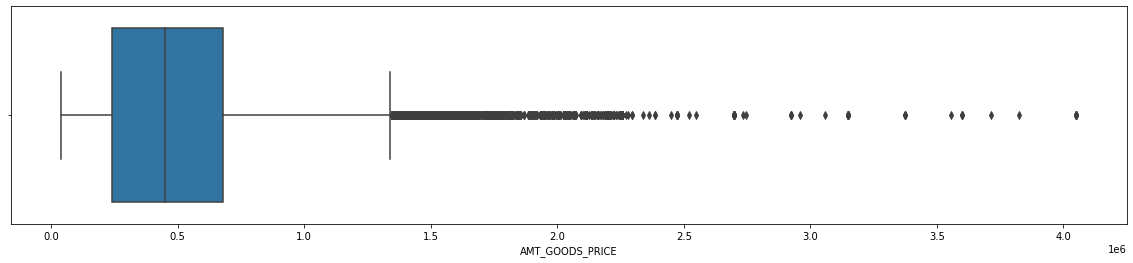

In [ ]:
# checking for outliers in AMT_GOODS_PRICE
plt.figure(figsize=[20,4])
sns.boxplot(df_app['AMT_GOODS_PRICE'])

In [ ]:
# we are filling nan values of AMT_GOODS_PRICE with median of the column

df_app['AMT_GOODS_PRICE'].fillna(450000, inplace=True)
df_app['AMT_GOODS_PRICE'].isnull().sum()

0

In [ ]:
df_app['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:xlabel='AMT_ANNUITY'>

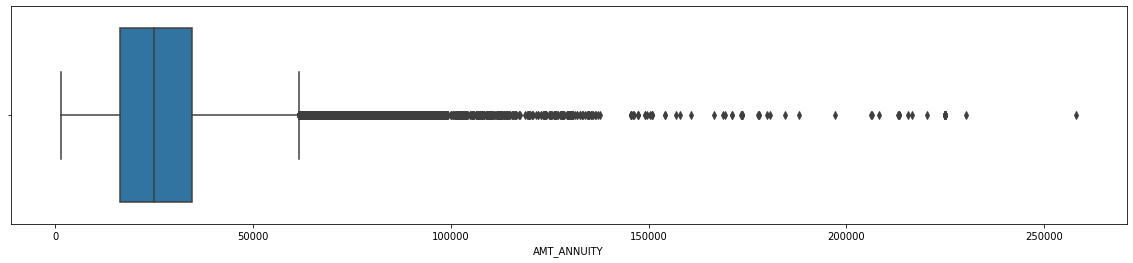

In [ ]:
# checking for outliers in AMT_GOODS_PRICE

plt.figure(figsize=[20,4])
sns.boxplot(df_app['AMT_ANNUITY'])

In [ ]:
# we are filling nan values of AMT_ANNUITY with median of the column

df_app['AMT_ANNUITY'].fillna(24903, inplace=True)
df_app['AMT_ANNUITY'].isnull().sum()

0

In [ ]:
df_app['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize=True)*100

0.0       12.250659
1.0        0.914442
2.0        0.753797
3.0        0.573315
4.0        0.417873
            ...    
4051.0     0.000325
3593.0     0.000325
3622.0     0.000325
3570.0     0.000325
3538.0     0.000325
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: float64

In [ ]:
df_app['DAYS_LAST_PHONE_CHANGE'].median()

757.0

<AxesSubplot:xlabel='DAYS_LAST_PHONE_CHANGE'>

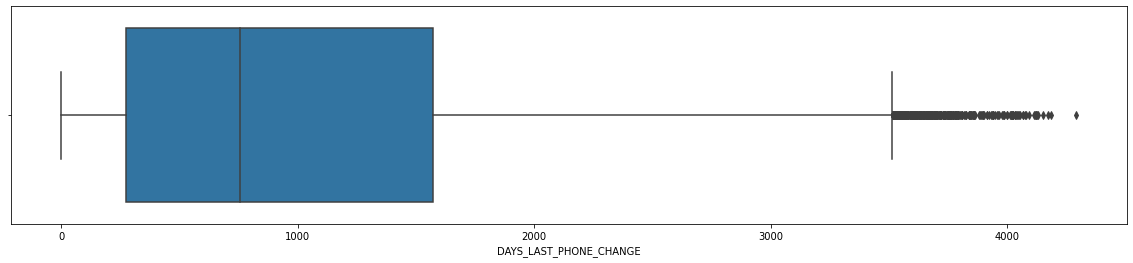

In [ ]:
# checking for outliers in DAYS_LAST_PHONE_CHANGE

plt.figure(figsize=[20,4])
sns.boxplot(df_app['DAYS_LAST_PHONE_CHANGE'])

In [ ]:
# we are filling nan values of DAYS_LAST_PHONE_CHANGE with median of the column

df_app['DAYS_LAST_PHONE_CHANGE'].fillna(757, inplace=True)
df_app['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

## Working on categorical variables

In [ ]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                       2.0                       2.0   
1                  School                       1.0                       0.0   
2              Government                       0.0                       0.0   
3  Business Entity Type 3                       2.0                       0.0   
4                Religion                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                  1134.0   
1                       1.0                       0.0                   828.0   
2                       0.0                       0.0                   815.0   
3                       2.0                       0.0                   617.0   
4                       0.0                       0.0                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_

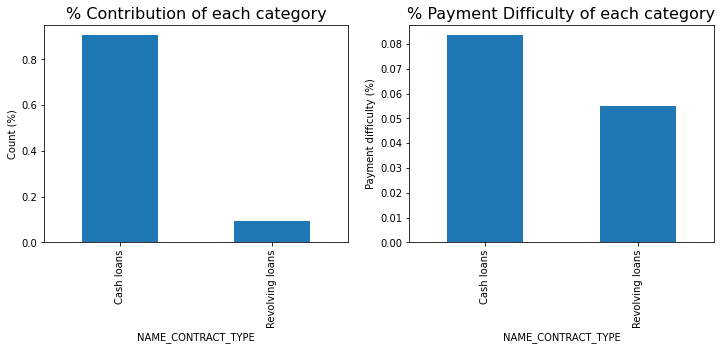

In [ ]:
# for NAME_CONTRACT_TYPE column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='NAME_CONTRACT_TYPE')['TARGET'].mean().plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: Applicants with contract product type as 'Cash' are more likely to have loan payment difficulty

In [ ]:
df_app['CODE_GENDER'].value_counts()

# these XNA values must be replaced with mode

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
# replacing XNA with F

df_app['CODE_GENDER']  = df_app['CODE_GENDER'].apply(lambda x: 'F' if x=='XNA' else x)

# also we can use iloc approach as that one is faster: df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'

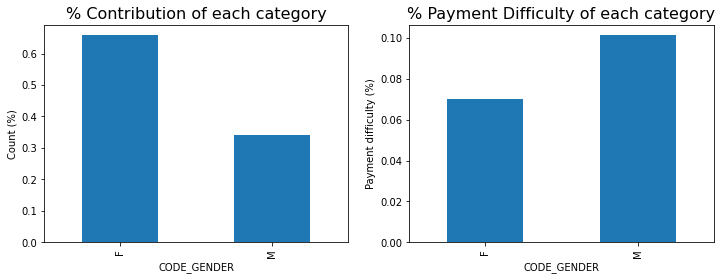

In [ ]:
# for CODE_GENDER column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['CODE_GENDER'].value_counts(normalize=True).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("CODE_GENDER")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='CODE_GENDER')['TARGET'].mean().plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("CODE_GENDER")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: Males more likely to have loan payment difficulty

In [ ]:
df_app['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

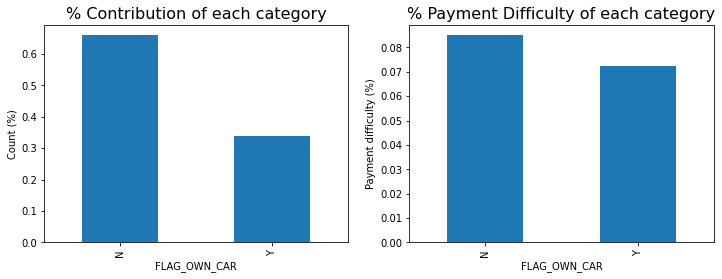

In [ ]:
# for FLAG_OWN_CAR column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['FLAG_OWN_CAR'].value_counts(normalize=True).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("FLAG_OWN_CAR")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='FLAG_OWN_CAR')['TARGET'].mean().plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("FLAG_OWN_CAR")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [ ]:
df_app['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

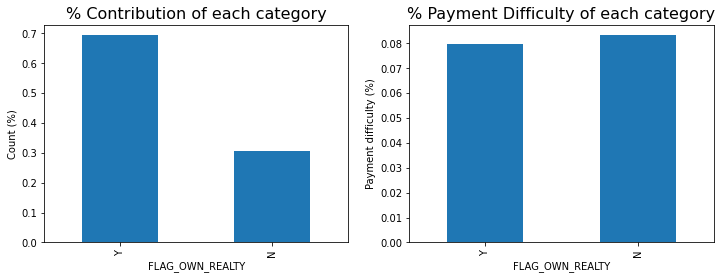

In [ ]:
# for FLAG_OWN_REALTY column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['FLAG_OWN_REALTY'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("FLAG_OWN_REALTY")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='FLAG_OWN_REALTY')['TARGET'].mean().sort_values(ascending=True).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("FLAG_OWN_REALTY")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [ ]:
df_app['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

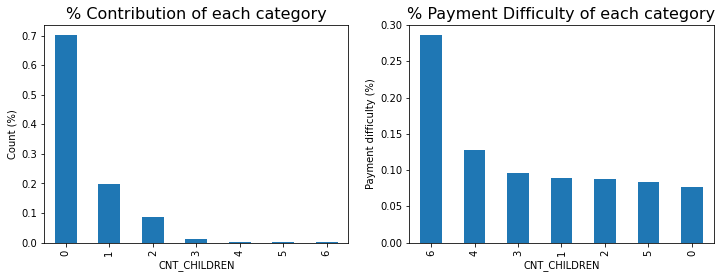

In [ ]:
# only few people have children more than 6, so removing data points where children > 6
df_app = df_app[df_app['CNT_CHILDREN'] <=6]


# plotting for CNT_CHILDREN column
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['CNT_CHILDREN'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("CNT_CHILDREN")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='CNT_CHILDREN')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("CNT_CHILDREN")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: Applicants with children >= 6 have double or triple loan payment difficulty than applicants with children <= 5

In [ ]:
df_app['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248512
Family              40144
Spouse, partner     11369
Children             3266
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
df_app['NAME_TYPE_SUITE'].isnull().any()

True

In [ ]:
# replacing nan values with mode of the column
df_app['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

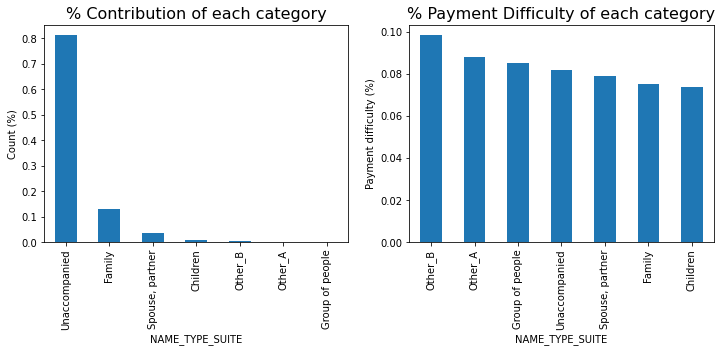

In [ ]:
# for NAME_TYPE_SUITE column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['NAME_TYPE_SUITE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_TYPE_SUITE")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='NAME_TYPE_SUITE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("NAME_TYPE_SUITE")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [ ]:
df_app['NAME_INCOME_TYPE'].value_counts()

Working                 158762
Commercial associate     71610
Pensioner                55361
State servant            21702
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

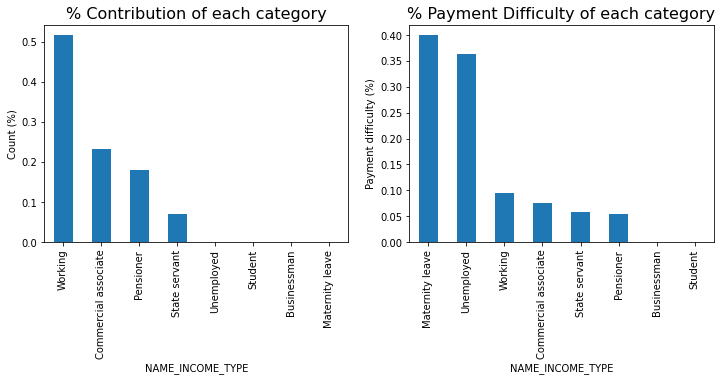

In [ ]:
# for NAME_INCOME_TYPE column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['NAME_INCOME_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: Applicants which are on maternity leave or are unemployed have almost 4 times loan payment difficulty than other income source applicants
# Observation: businessman people do not have difficulty in loan paymewent

In [ ]:
df_app['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218374
Higher education                  74859
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

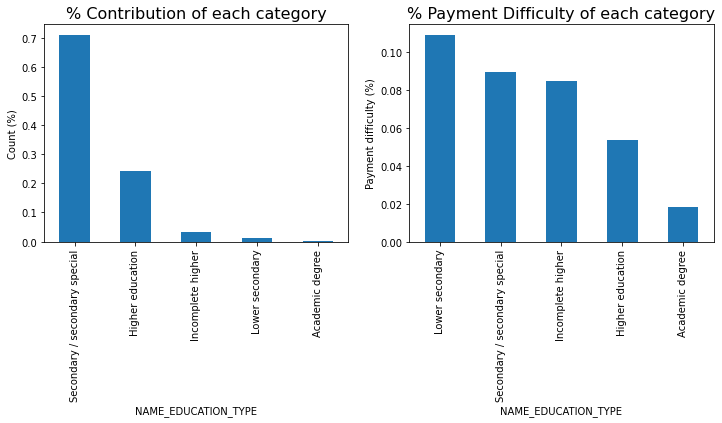

In [ ]:
# for NAME_EDUCATION_TYPE column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['NAME_EDUCATION_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: Applicants with lower secondary education level have loan payment difficulty
# Observation: Applicants with Higher education level or having Academic degree have very less loan payment difficulty

In [ ]:
df_app['NAME_FAMILY_STATUS'].value_counts()

Married                 196418
Single / not married     45441
Civil marriage           29773
Separated                19769
Widow                    16087
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
# removing 'unknown' values as they are only 2 in number
df_app = df_app[~(df_app['NAME_FAMILY_STATUS'] == 'Unknown')]

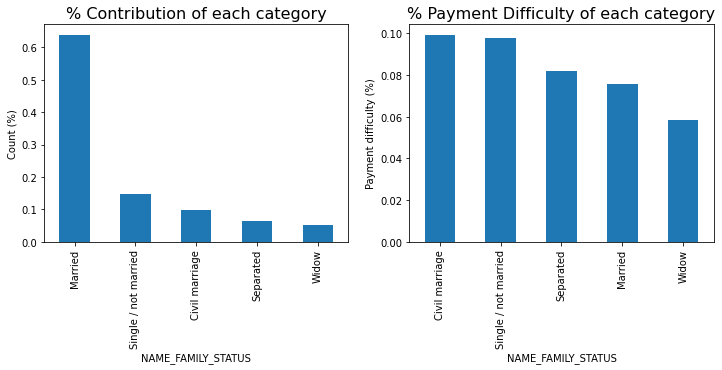

In [ ]:
# for NAME_FAMILY_STATUS columns

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['NAME_FAMILY_STATUS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='NAME_FAMILY_STATUS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: widows are less likely to face loan payment difficulty (interesting)

In [ ]:
df_app['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272848
With parents            14840
Municipal apartment     11180
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

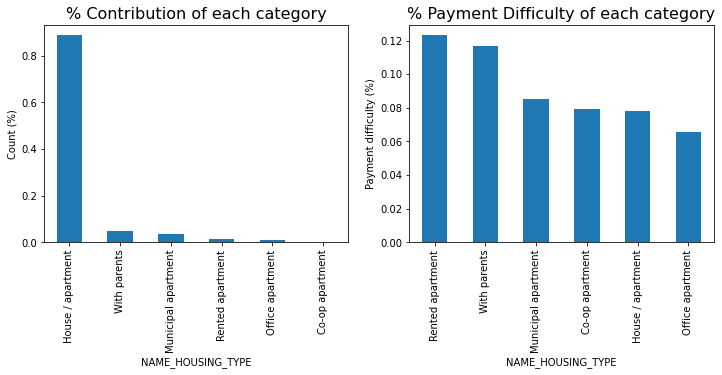

In [ ]:
# for NAME_HOUSING_TYPE column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['NAME_HOUSING_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='NAME_HOUSING_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: Applicants which are living in rented apartments or living with parents have more loan payment difficulty

In [ ]:
df_app['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      53896
WEDNESDAY    51932
MONDAY       50714
THURSDAY     50586
FRIDAY       50330
SATURDAY     33851
SUNDAY       16179
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

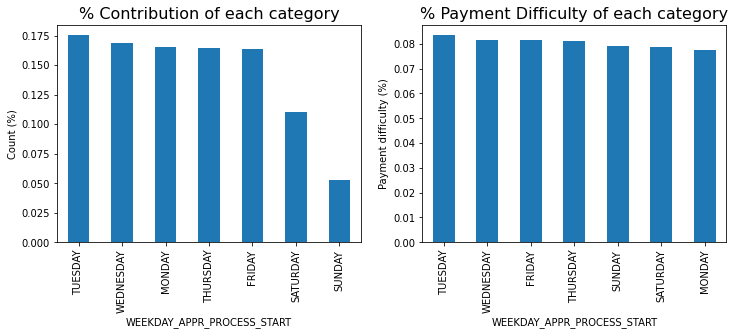

In [ ]:
# for WEEKDAY_APPR_PROCESS_START column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("WEEKDAY_APPR_PROCESS_START")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='WEEKDAY_APPR_PROCESS_START')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("WEEKDAY_APPR_PROCESS_START")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [ ]:
df_app['ORGANIZATION_TYPE'].value_counts().head()

Business Entity Type 3    67989
XNA                       55373
Self-employed             38409
Other                     16682
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

In [ ]:
# replacing nan values with mode of the column
df_app['ORGANIZATION_TYPE'] = df_app['ORGANIZATION_TYPE'].replace('XNA', 'Business Entity Type 3')

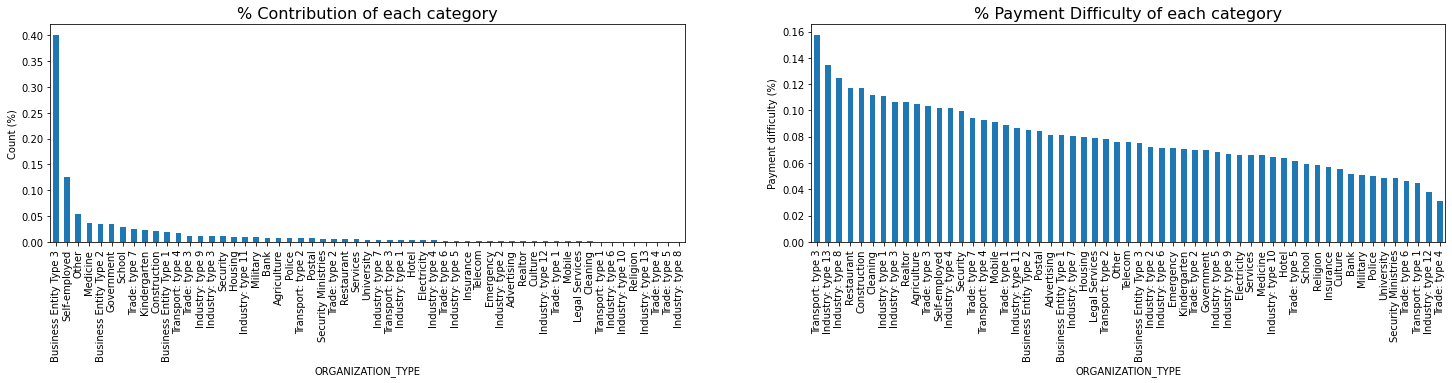

In [ ]:
# for ORGANIZATION_TYPE column

plt.figure(figsize=[25,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['ORGANIZATION_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("ORGANIZATION_TYPE")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='ORGANIZATION_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("ORGANIZATION_TYPE")
plt.ylabel("Payment difficulty (%)")

plt.show()

## Working on continuous variables

In [ ]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                       2.0                       2.0   
1                  School                       1.0                       0.0   
2              Government                       0.0                       0.0   
3  Business Entity Type 3                       2.0                       0.0   
4                Religion                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                  1134.0   
1                       1.0                       0.0                   828.0   
2                       0.0                       0.0                   815.0   
3                       2.0                       0.0                   617.0   
4                       0.0                       0.0                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_

In [ ]:
df_app['AMT_INCOME_TOTAL'].describe()

count    3.074880e+05
mean     1.687981e+05
std      2.371305e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

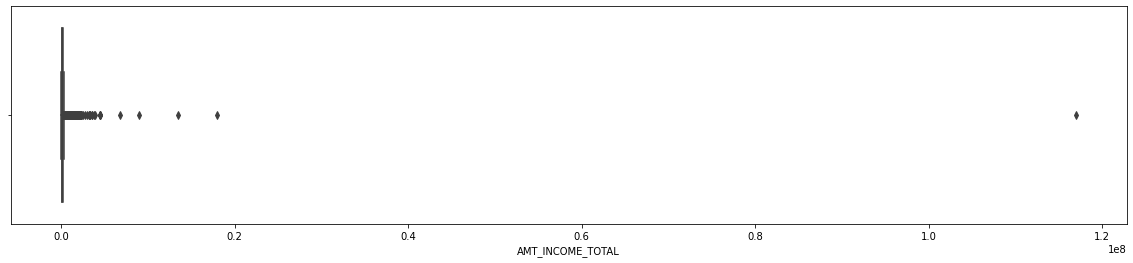

In [ ]:
# checking for outliers

plt.figure(figsize=[20,4])
sns.boxplot(df_app['AMT_INCOME_TOTAL'])

In [ ]:
# further outlier analysis
df_app['AMT_INCOME_TOTAL'].quantile([0.5, 0.7, 0.9, 0.95, 0.99, 0.999, 0.9999, 0.99999])

0.50000    1.471500e+05
0.70000    1.800000e+05
0.90000    2.700000e+05
0.95000    3.375000e+05
0.99000    4.725000e+05
0.99900    9.000000e+05
0.99990    2.250000e+06
0.99999    8.831542e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
# keeping rows where AMT_INCOME_TOTAL value < 24 lacks

df_app = df_app[df_app['AMT_INCOME_TOTAL'] < 2400000]

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

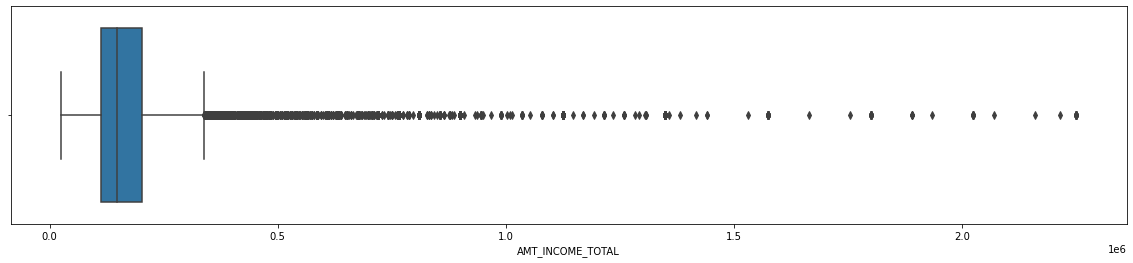

In [ ]:
plt.figure(figsize=[20,4])
sns.boxplot(df_app['AMT_INCOME_TOTAL'])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

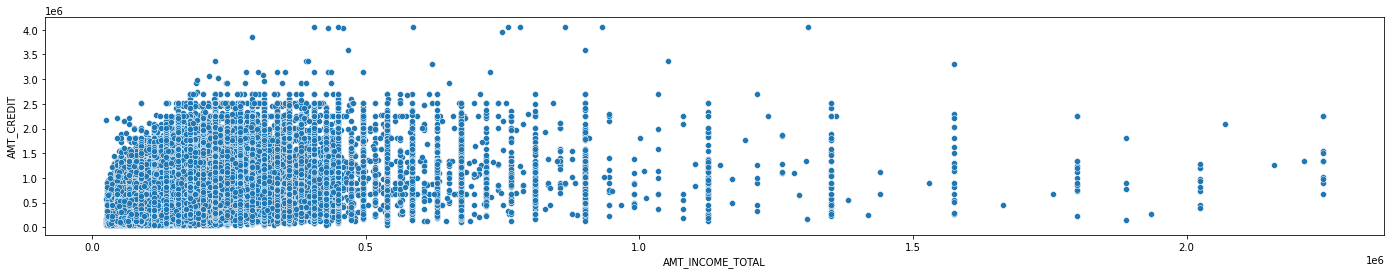

In [ ]:
plt.figure(figsize=[24,4])
sns.scatterplot(df_app['AMT_INCOME_TOTAL'], df_app['AMT_CREDIT'])

In [ ]:
df_app['AMT_INCOME_BINS'] = pd.qcut(df_app['AMT_INCOME_TOTAL'], q=[0, 0.2, 0.4, 0.6, 0.8, 0.9, 1], labels=['VL', 'L', 'M', 'H', 'VH', 'VVH'])

# q cut means quantile based cut
# 0 to 20 percentile: Very low income (VL)
# .
# .
# 90 to 100 percentile: Very very high income (VVH)

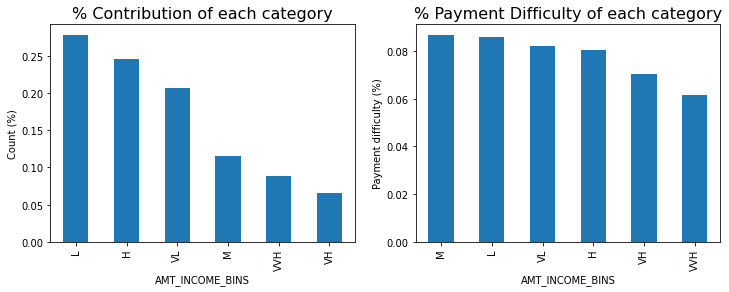

In [ ]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['AMT_INCOME_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("AMT_INCOME_BINS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='AMT_INCOME_BINS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("AMT_INCOME_BINS")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [ ]:
df_app['AMT_CREDIT'].describe()

count    3.074680e+05
mean     5.990025e+05
std      4.024680e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<AxesSubplot:xlabel='AMT_CREDIT'>

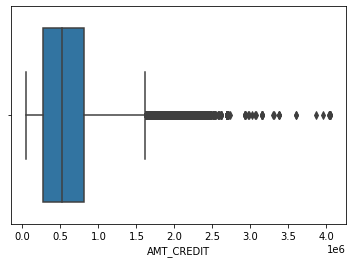

In [ ]:
sns.boxplot(df_app['AMT_CREDIT'])

In [ ]:
df_app['AMT_CREDIT_BINS'] = pd.qcut(df_app['AMT_CREDIT'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M', 'H', 'VH'])

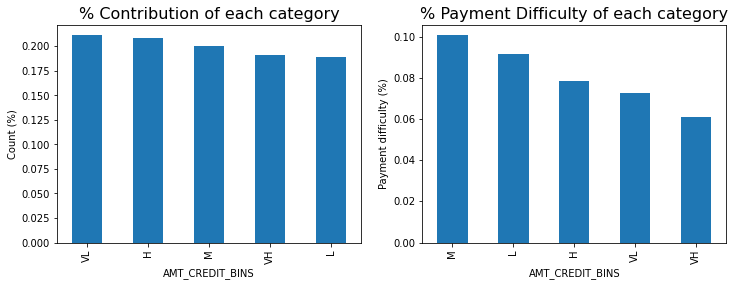

In [ ]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['AMT_CREDIT_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("AMT_CREDIT_BINS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='AMT_CREDIT_BINS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("AMT_CREDIT_BINS")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [ ]:
df_app['AMT_ANNUITY'].describe()

count    307468.000000
mean      27105.364950
std       14480.725918
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:xlabel='AMT_ANNUITY'>

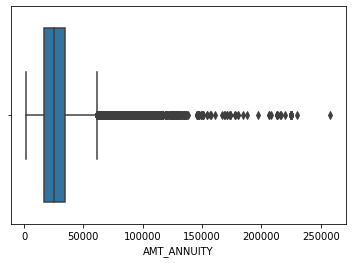

In [ ]:
sns.boxplot(df_app['AMT_ANNUITY'])

In [ ]:
df_app['AMT_ANNUITY_BINS'] = pd.qcut(df_app['AMT_ANNUITY'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M', 'H', 'VH'])

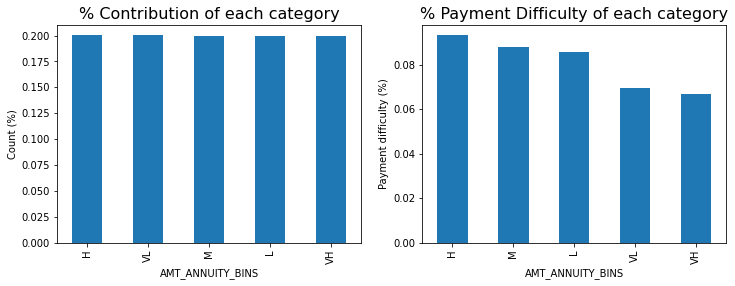

In [ ]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['AMT_ANNUITY_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("AMT_ANNUITY_BINS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='AMT_ANNUITY_BINS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("AMT_ANNUITY_BINS")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [ ]:
df_app['AMT_GOODS_PRICE'].describe()

count    3.074680e+05
mean     5.382921e+05
std      3.692589e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

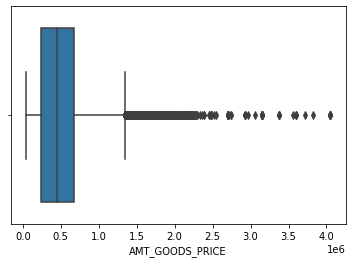

In [ ]:
sns.boxplot(df_app['AMT_GOODS_PRICE'])

In [ ]:
df_app['AMT_GOODS_PRICE_BINS'] = pd.qcut(df_app['AMT_GOODS_PRICE'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M', 'H', 'VH'])

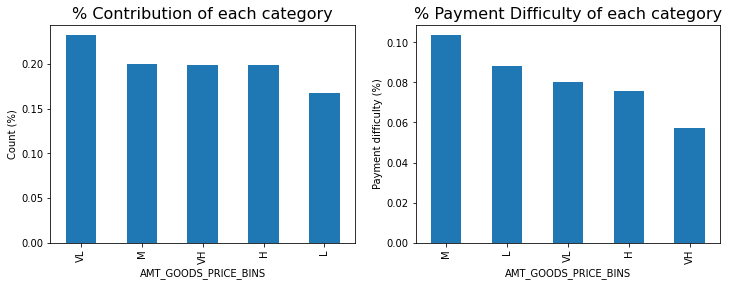

In [ ]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['AMT_GOODS_PRICE_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("AMT_GOODS_PRICE_BINS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='AMT_GOODS_PRICE_BINS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("AMT_GOODS_PRICE_BINS")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [ ]:
df_app['REGION_POPULATION_RELATIVE'].describe()

count    307468.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

<AxesSubplot:xlabel='REGION_POPULATION_RELATIVE'>

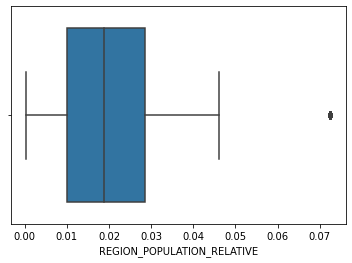

In [ ]:
sns.boxplot(df_app['REGION_POPULATION_RELATIVE'])

In [ ]:
df_app[df_app['REGION_POPULATION_RELATIVE'] > 0.07]['REGION_POPULATION_RELATIVE'].value_counts()

# 8412 data points have REGION_POPULATION_RELATIVE value = 0.072508 (but not an outlier)

0.072508    8412
Name: REGION_POPULATION_RELATIVE, dtype: int64

In [ ]:
df_app['REGION_POPULATION_RELATIVE_BINS'] = pd.qcut(df_app['REGION_POPULATION_RELATIVE'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M', 'H', 'VH'])

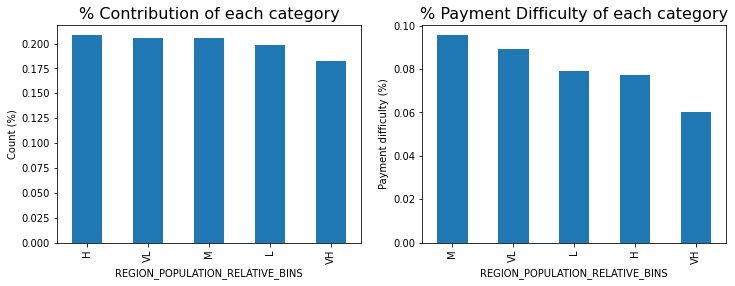

In [ ]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['REGION_POPULATION_RELATIVE_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("REGION_POPULATION_RELATIVE_BINS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='REGION_POPULATION_RELATIVE_BINS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("REGION_POPULATION_RELATIVE_BINS")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [ ]:
df_app['DAYS_BIRTH'].describe()

# Age in days does not make that much of sense, so convert them to years first

count    307468.000000
mean      16037.218325
std        4364.124361
min        7489.000000
25%       12413.000000
50%       15751.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

<AxesSubplot:xlabel='DAYS_BIRTH'>

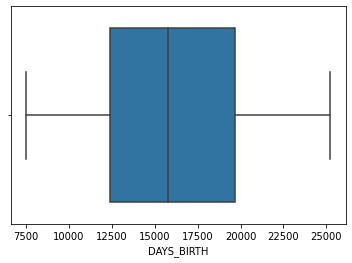

In [ ]:
sns.boxplot(df_app['DAYS_BIRTH'])

In [ ]:
df_app['YEARS_BIRTH'] = df_app['DAYS_BIRTH'].apply(lambda x: int(x/365))
df_app['YEARS_BIRTH'].describe()

count    307468.000000
mean         43.436579
std          11.954962
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64

In [ ]:
df_app['YEARS_BIRTH_GROUPS'] = pd.cut(df_app['YEARS_BIRTH'], bins=[18,26,36,48,60,9999], labels=['below-26', '26-36', '36-48', '48-60', 'above-60' ])

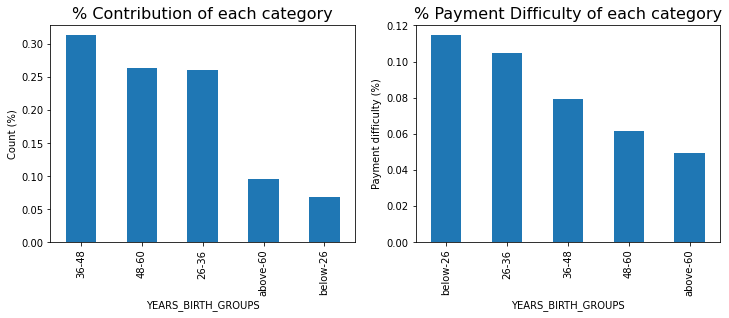

In [ ]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['YEARS_BIRTH_GROUPS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("YEARS_BIRTH_GROUPS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='YEARS_BIRTH_GROUPS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("YEARS_BIRTH_GROUPS")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: smaller the age, more will be the loan payment difficulty

In [ ]:
df_app['DAYS_EMPLOYED'].describe()

count    307468.000000
mean      67732.725636
std      139450.364411
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

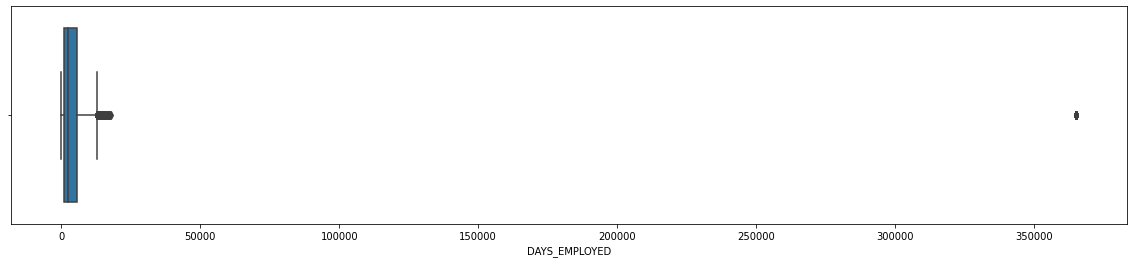

In [ ]:
plt.figure(figsize=[20,4])
sns.boxplot(df_app['DAYS_EMPLOYED'])

In [ ]:
df_app = df_app[df_app['DAYS_EMPLOYED'] < 350000]

In [ ]:
365243/365

# 1000 years!

1000.6657534246575

In [ ]:
df_app['YEARS_EMPLOYED'] = df_app['DAYS_EMPLOYED'].apply(lambda x: int(x/365))
df_app['YEARS_EMPLOYED'].describe()

count    252095.000000
mean          6.037089
std           6.416145
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max          49.000000
Name: YEARS_EMPLOYED, dtype: float64

<AxesSubplot:xlabel='YEARS_EMPLOYED'>

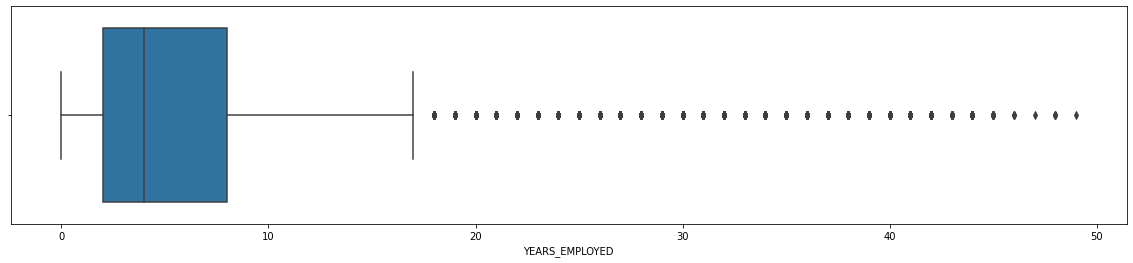

In [ ]:
plt.figure(figsize=[20,4])
sns.boxplot(df_app['YEARS_EMPLOYED'])

In [ ]:
print(np.percentile(df_app['YEARS_EMPLOYED'], 20))
print(np.percentile(df_app['YEARS_EMPLOYED'], 40))
print(np.percentile(df_app['YEARS_EMPLOYED'], 60))
print(np.percentile(df_app['YEARS_EMPLOYED'], 80))
print(np.percentile(df_app['YEARS_EMPLOYED'], 100))

1.0
3.0
5.0
10.0
49.0


In [ ]:
df_app['YEARS_EMPLOYED_GROUPS'] = pd.cut(df_app['YEARS_EMPLOYED'], [0,2,5,10,20,30,40,9999], labels=['0-2','2-5', '5-10', '10-20', '20-30', '30-40', '40+'])

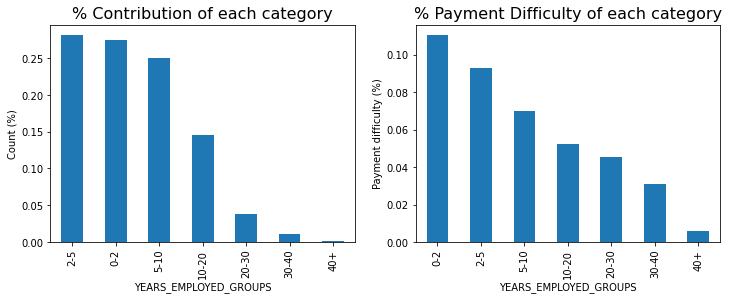

In [ ]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['YEARS_EMPLOYED_GROUPS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("YEARS_EMPLOYED_GROUPS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='YEARS_EMPLOYED_GROUPS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("YEARS_EMPLOYED_GROUPS")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: People with higher employment years havelesser loan payment difficulty

In [ ]:
df_app['DAYS_REGISTRATION'].describe()

count    252095.000000
mean       4635.537016
std        3252.253629
min           0.000000
25%        1845.000000
50%        4265.000000
75%        6952.500000
max       22928.000000
Name: DAYS_REGISTRATION, dtype: float64

<AxesSubplot:xlabel='YEARS_REGISTRATION'>

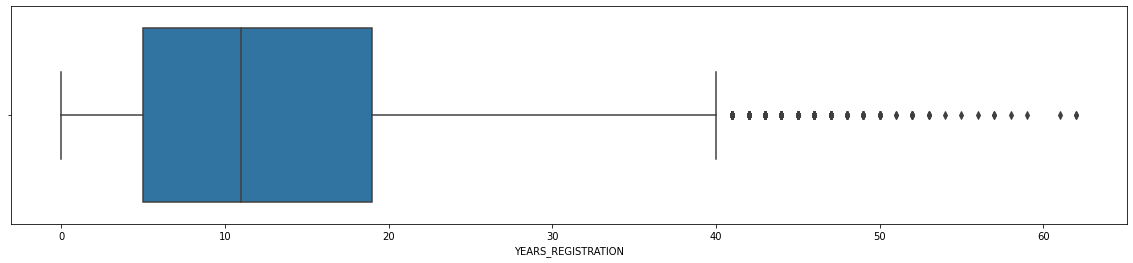

In [ ]:
df_app['YEARS_REGISTRATION'] = df_app['DAYS_REGISTRATION'].apply(lambda x: int(x/365))

plt.figure(figsize=[20,4])
sns.boxplot(df_app['YEARS_REGISTRATION'])

In [ ]:
print(np.percentile(df_app['YEARS_REGISTRATION'], 20))
print(np.percentile(df_app['YEARS_REGISTRATION'], 40))
print(np.percentile(df_app['YEARS_REGISTRATION'], 60))
print(np.percentile(df_app['YEARS_REGISTRATION'], 80))
print(np.percentile(df_app['YEARS_REGISTRATION'], 100))

3.0
9.0
13.0
20.0
62.0


In [ ]:
df_app['YEARS_REGISTRATION_GROUPS'] = pd.cut(df_app['YEARS_REGISTRATION'], [0,2,5,10,20,30,40,9999], labels=['0-2','2-5', '5-10', '10-20', '20-30', '30-40', '40+'])

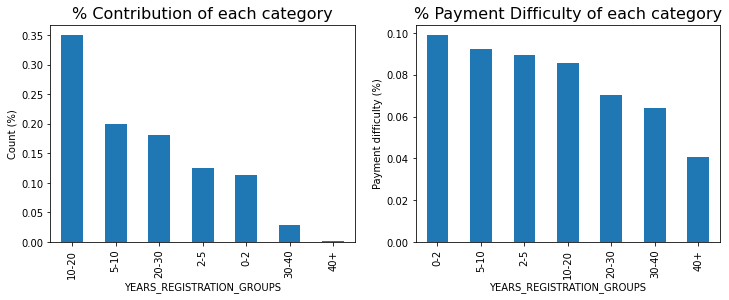

In [ ]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['YEARS_REGISTRATION_GROUPS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("YEARS_REGISTRATION_GROUPS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='YEARS_REGISTRATION_GROUPS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("YEARS_REGISTRATION_GROUPS")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [ ]:
df_app['DAYS_ID_PUBLISH'].describe()

count    252095.000000
mean       2800.626359
std        1515.363323
min           0.000000
25%        1487.000000
50%        2886.000000
75%        4177.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

<AxesSubplot:xlabel='YEARS_ID_PUBLISH'>

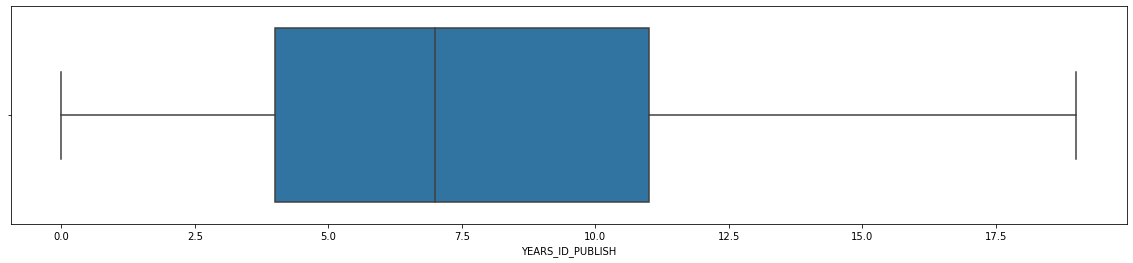

In [ ]:
df_app['YEARS_ID_PUBLISH'] = df_app['DAYS_ID_PUBLISH'].apply(lambda x: int(x/365))

plt.figure(figsize=[20,4])
sns.boxplot(df_app['YEARS_ID_PUBLISH'])

In [ ]:
print(np.percentile(df_app['YEARS_ID_PUBLISH'], 20))
print(np.percentile(df_app['YEARS_ID_PUBLISH'], 40))
print(np.percentile(df_app['YEARS_ID_PUBLISH'], 60))
print(np.percentile(df_app['YEARS_ID_PUBLISH'], 80))
print(np.percentile(df_app['YEARS_ID_PUBLISH'], 100))

3.0
6.0
9.0
11.0
19.0


In [ ]:
df_app['YEARS_ID_PUBLISH_GROUPS'] = pd.cut(df_app['YEARS_ID_PUBLISH'], [0,3,6,9,11,100], labels=['0-3', '3-6', '6-9', '9-11', '11+' ])

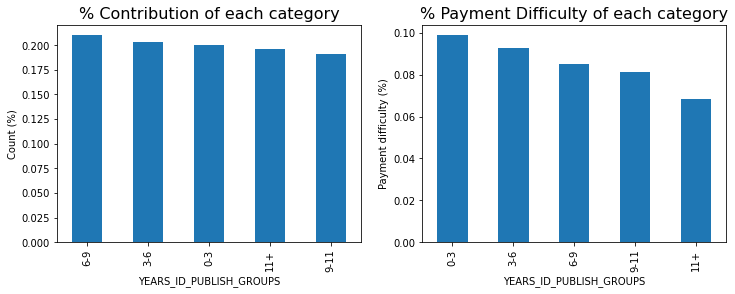

In [ ]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['YEARS_ID_PUBLISH_GROUPS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("YEARS_ID_PUBLISH_GROUPS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='YEARS_ID_PUBLISH_GROUPS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("YEARS_ID_PUBLISH_GROUPS")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [ ]:
df_app['DAYS_LAST_PHONE_CHANGE'].describe()

count    252095.000000
mean        971.064496
std         827.306679
min           0.000000
25%         288.000000
50%         763.000000
75%        1578.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

<AxesSubplot:xlabel='YEARS_LAST_PHONE_CHANGE'>

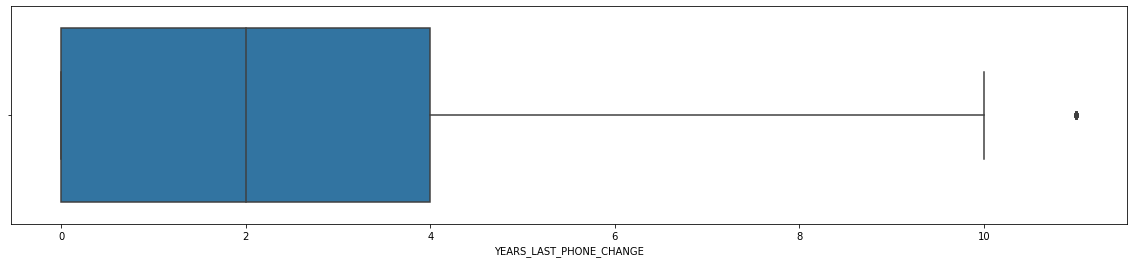

In [ ]:
df_app['YEARS_LAST_PHONE_CHANGE'] = df_app['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: int(x/365))

plt.figure(figsize=[20,4])
sns.boxplot(df_app['YEARS_LAST_PHONE_CHANGE'])

In [ ]:
print(np.percentile(df_app['YEARS_LAST_PHONE_CHANGE'], 20))
print(np.percentile(df_app['YEARS_LAST_PHONE_CHANGE'], 40))
print(np.percentile(df_app['YEARS_LAST_PHONE_CHANGE'], 60))
print(np.percentile(df_app['YEARS_LAST_PHONE_CHANGE'], 80))
print(np.percentile(df_app['YEARS_LAST_PHONE_CHANGE'], 100))

0.0
1.0
2.0
4.0
11.0


In [ ]:
df_app['YEARS_LAST_PHONE_CHANGE_GROUPS'] = pd.cut(df_app['YEARS_LAST_PHONE_CHANGE'], [0,1,2,3,4,5,999], labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5+' ])

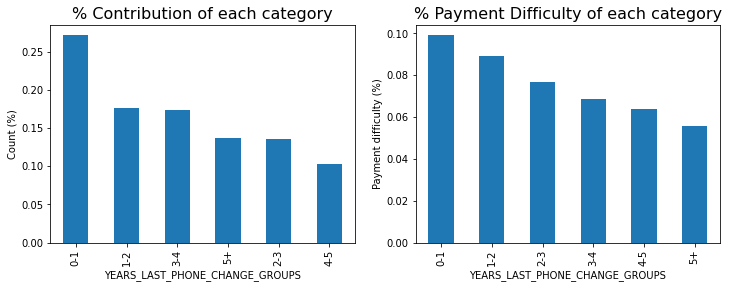

In [ ]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['YEARS_LAST_PHONE_CHANGE_GROUPS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("YEARS_LAST_PHONE_CHANGE_GROUPS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='YEARS_LAST_PHONE_CHANGE_GROUPS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("YEARS_LAST_PHONE_CHANGE_GROUPS")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: Applicants who do not change their phone very often have less loan payment difficulty

<AxesSubplot:>

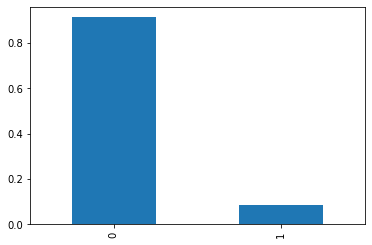

In [ ]:
df_app['TARGET'].value_counts(normalize=True).plot.bar()

In [ ]:
df_app['TARGET'].mean()*100

# Around 8.6 percent applicants have difficulty in loan payment

8.659433943553026

In [ ]:
# since we have created year columns from day column, so drop previous columns
discard_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
df_app.drop(discard_list, axis=1, inplace=True)
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801        Laborers              1.0   
1                    0.003541      Core staff              2.0   
2                    0.010032        Laborers              1.0   
3                    0.008019        Laborers              2.0   
4                    0.028663      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY  Business Entity Type 3   
1                     MONDAY                  School   
2                     MONDAY              Government   
3                  WEDNESDAY  Business Entity Type 3   
4                   THURSDAY                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0

## Bivariate analysis

In [ ]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801        Laborers              1.0   
1                    0.003541      Core staff              2.0   
2                    0.010032        Laborers              1.0   
3                    0.008019        Laborers              2.0   
4                    0.028663      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY  Business Entity Type 3   
1                     MONDAY                  School   
2                     MONDAY              Government   
3                  WEDNESDAY  Business Entity Type 3   
4                   THURSDAY                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0

In [ ]:
df_app_numerical = df_app[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION','YEARS_ID_PUBLISH']]

### For all the applicants (TARGET = 0, 1)

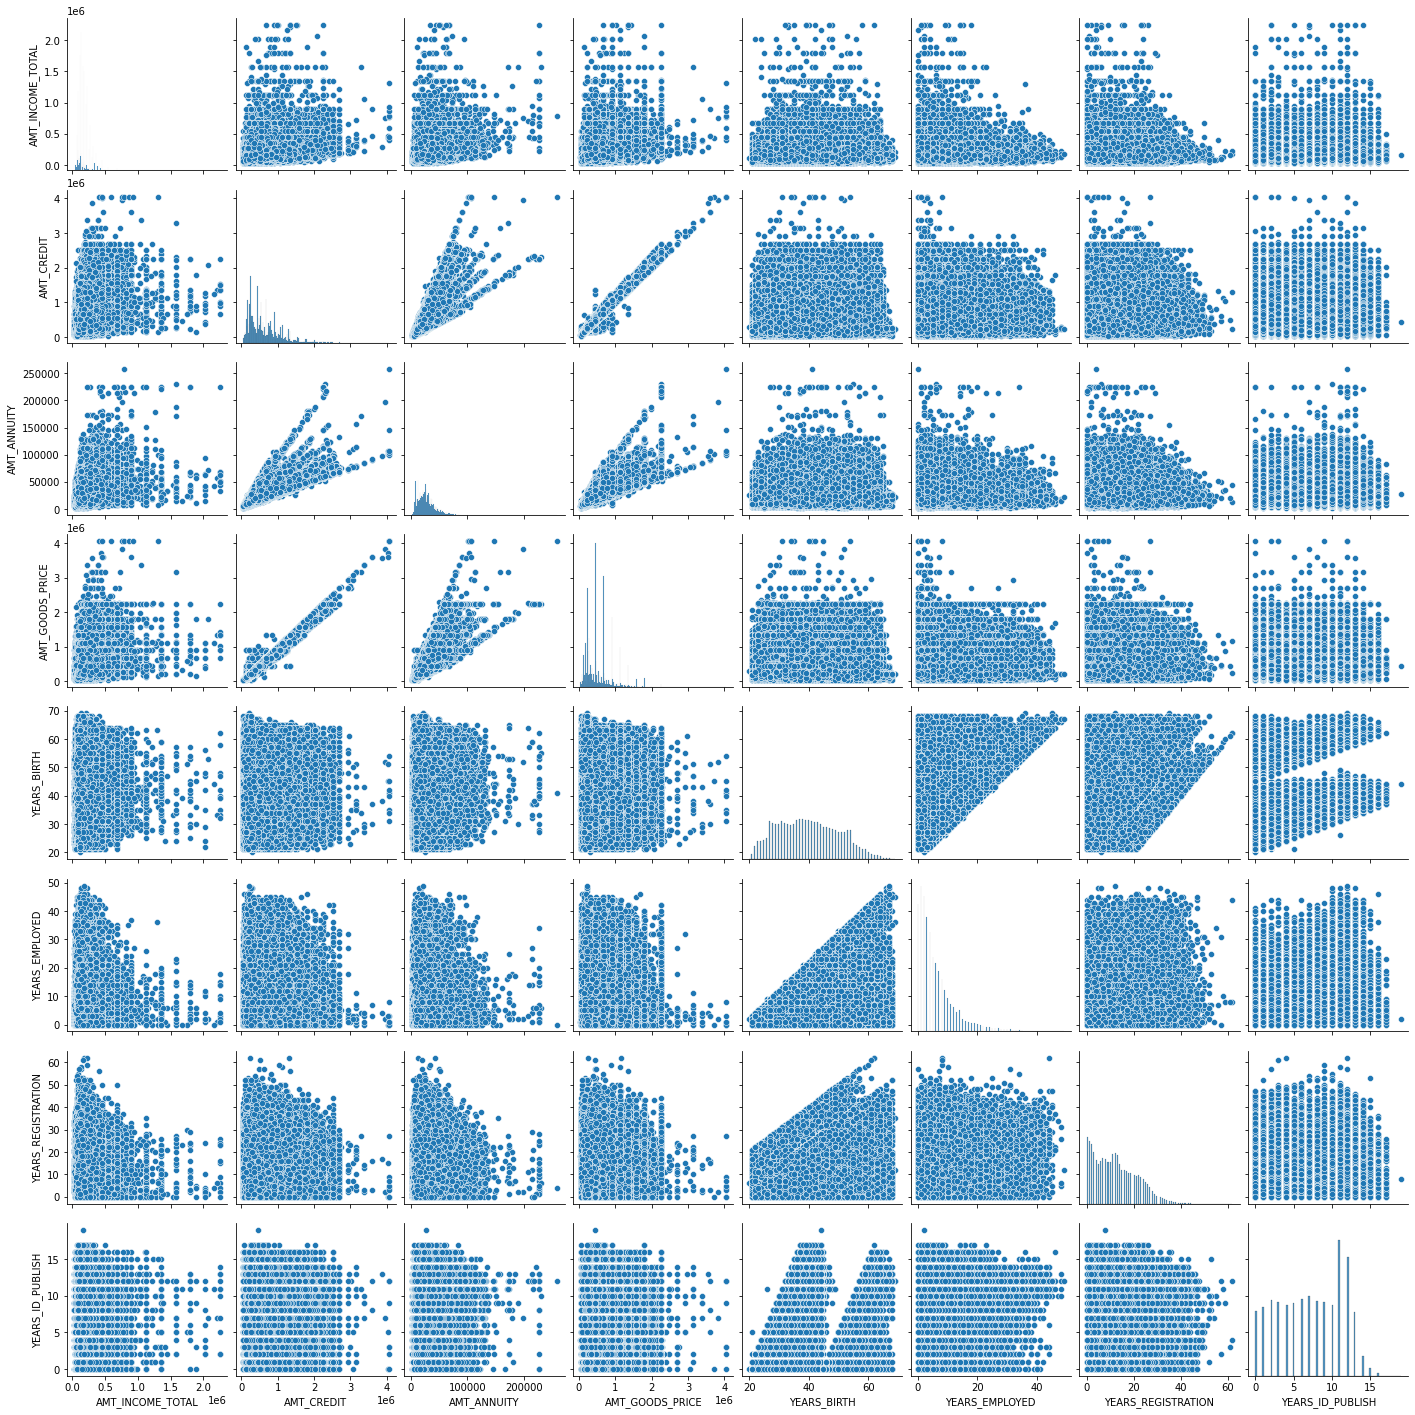

In [ ]:
# pairplot for all numerical columns of all the rows

sns.pairplot(df_app_numerical.fillna(0))

# we can clearly see some variables have strong and medium correlation b etween them, we will see that in correlation heatmap in the nextr cell

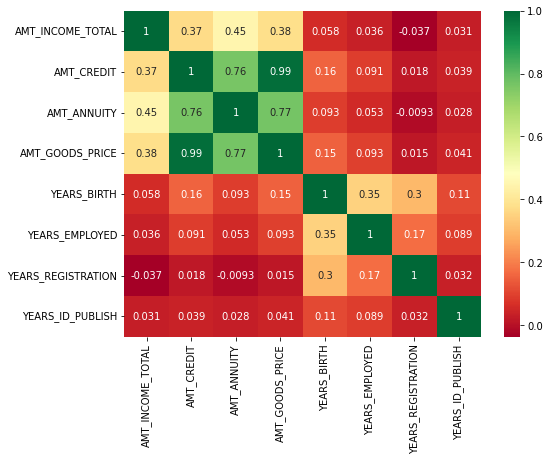

In [ ]:
# heatmap for all numerical columns of all the rows
df_app_numerical_heatmap = df_app_numerical.corr()

plt.figure(figsize=[8,6])
sns.heatmap(df_app_numerical_heatmap, annot=True, cmap='RdYlGn')
plt.show()

### For applicants which are having loan payment difficulty (TARGET == 1)

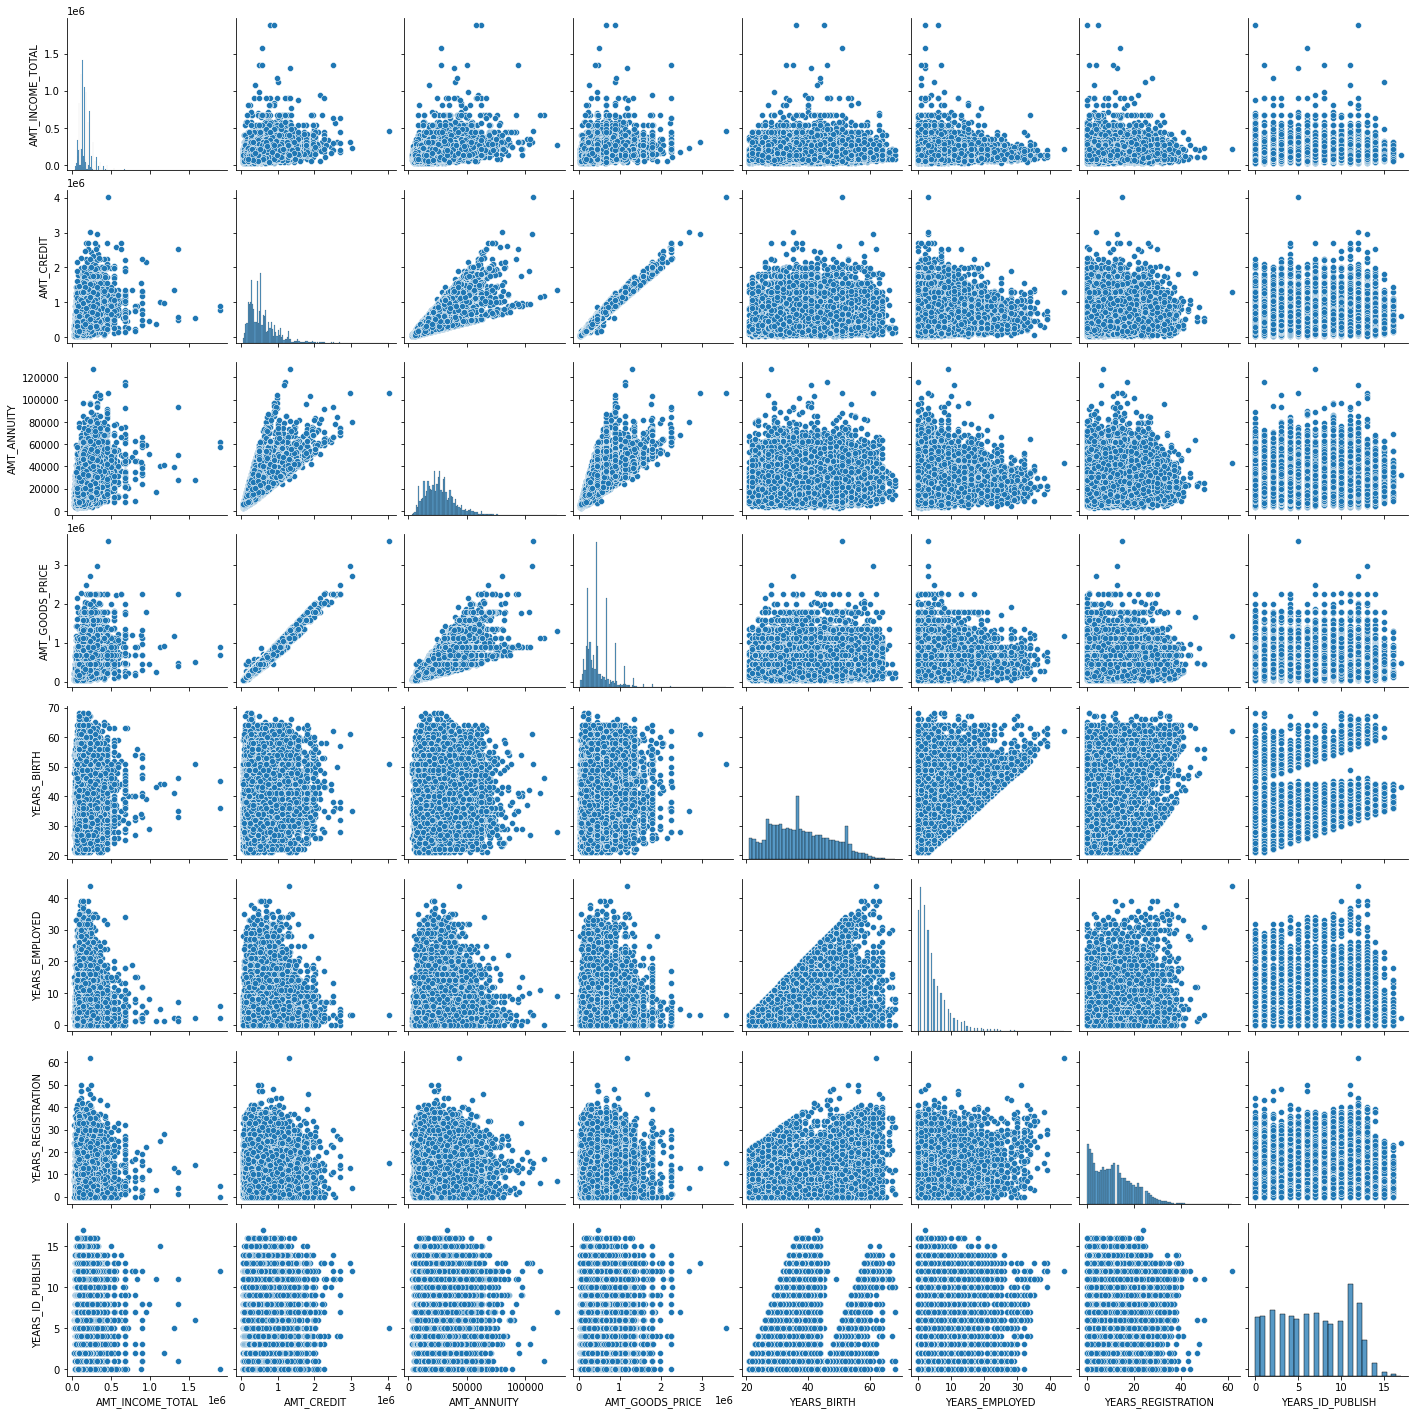

In [ ]:
# pairplot for all numerical columns of the rows where there is loan payment difficulty

df_app_numerical_with_difficulty = df_app[df_app['TARGET'] == 1]
df_app_numerical_with_difficulty = df_app_numerical_with_difficulty[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION','YEARS_ID_PUBLISH']]
sns.pairplot(df_app_numerical_with_difficulty.fillna(0))

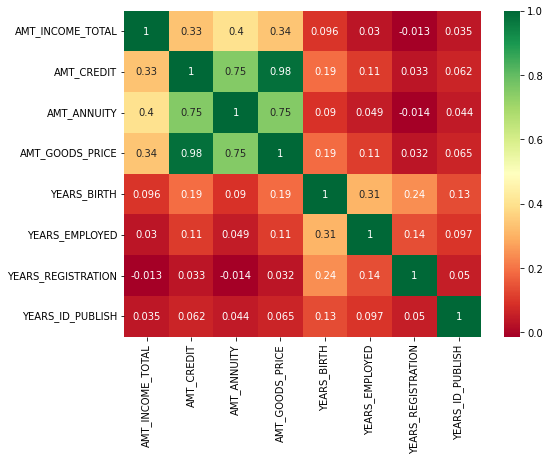

In [ ]:
# heatmap for all numerical columns of the rows where there is loan payment difficulty

df_app_numerical_with_difficulty_heatmap = df_app_numerical_with_difficulty.corr()

plt.figure(figsize=[8,6])
sns.heatmap(df_app_numerical_with_difficulty_heatmap, annot=True, cmap='RdYlGn')
plt.show()

### For applicants which are not having loan payment difficulty, and rest of the cases (TARGET == 0)

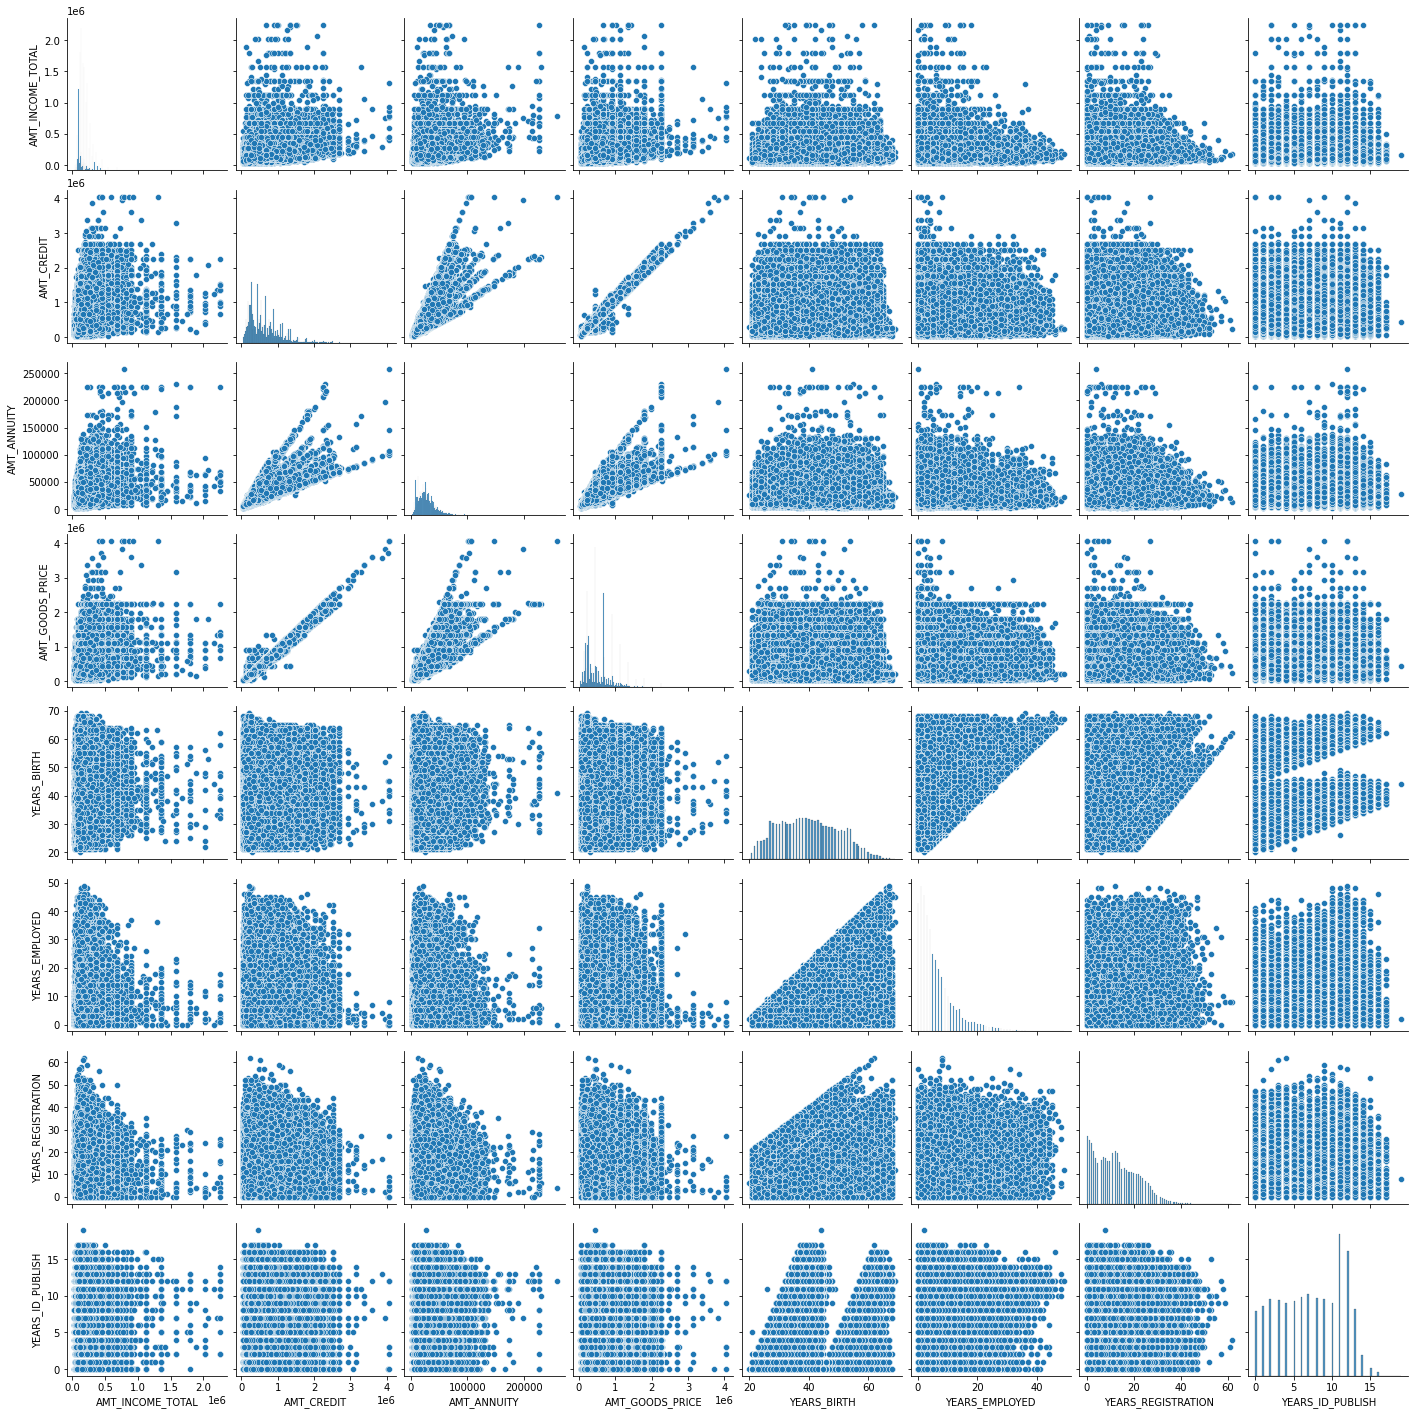

In [ ]:
# pairplot for all numerical columns of the rows where there is no loan payment difficulty (all other cases)

df_app_numerical_rest_all_cases = df_app[df_app['TARGET'] == 0]
df_app_numerical_rest_all_cases = df_app_numerical_rest_all_cases[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION','YEARS_ID_PUBLISH']]
sns.pairplot(df_app_numerical_rest_all_cases.fillna(0))

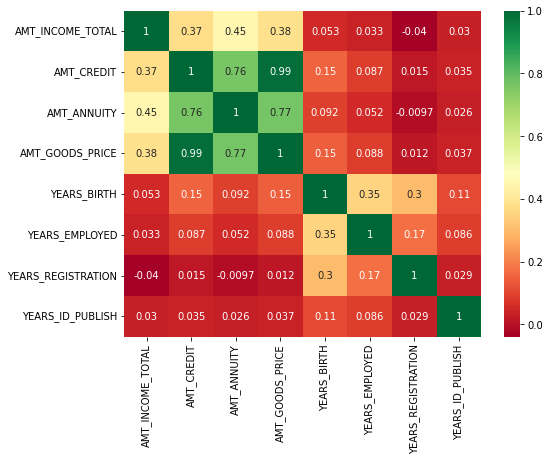

In [ ]:
# heatmap for all numerical columns of the rows where there is no loan payment difficulty (all other cases)

df_app_numerical_rest_all_cases_heatmap = df_app_numerical_rest_all_cases.corr()

plt.figure(figsize=[8,6])
sns.heatmap(df_app_numerical_rest_all_cases_heatmap, annot=True, cmap='RdYlGn')
plt.show()

In [ ]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801        Laborers              1.0   
1                    0.003541      Core staff              2.0   
2                    0.010032        Laborers              1.0   
3                    0.008019        Laborers              2.0   
4                    0.028663      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY  Business Entity Type 3   
1                     MONDAY                  School   
2                     MONDAY              Government   
3                  WEDNESDAY  Business Entity Type 3   
4                   THURSDAY                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0

### Some multivariate analysis on loan applicant data

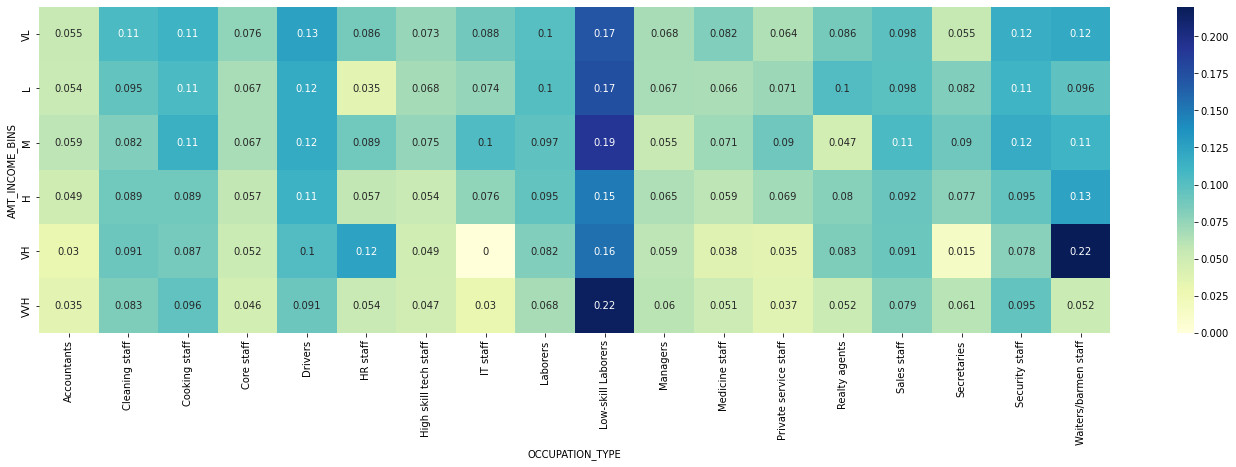

In [ ]:
pv1_ = pd.pivot_table(df_app, index=['AMT_INCOME_BINS'], columns=['OCCUPATION_TYPE'], values='TARGET')

plt.figure(figsize=[24,6])
sns.heatmap(pv1_, annot=True, cmap="YlGnBu")
plt.show()

# Observation: Lower skilled laborers have maximum loan payment difficulty, even true when they are having higher income.
# Observation: Accountants have least difficulty in loan payments

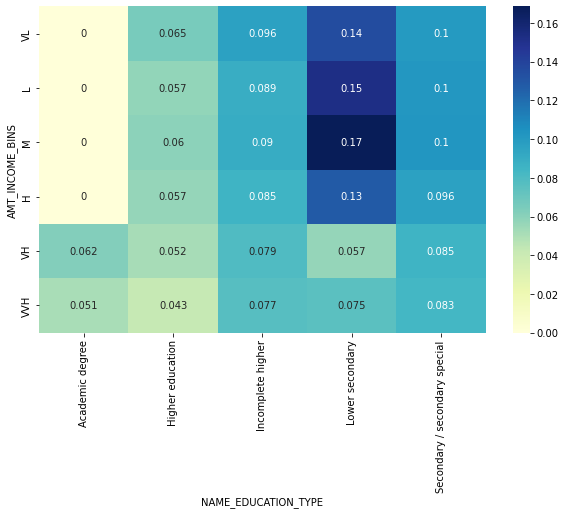

In [ ]:
pv2_ = pd.pivot_table(df_app, index=['AMT_INCOME_BINS'], columns=['NAME_EDUCATION_TYPE'], values='TARGET')

plt.figure(figsize=[10,6])
sns.heatmap(pv2_, annot=True, cmap="YlGnBu")
plt.show()

# Observation: people with lower secondary type of education have maximum loan payment difficulty

## Finding 10 Highest correlations between two variables:
#### we will only consider data where TARGET == 1

In [ ]:
df_app_numerical_with_difficulty.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0           202500.0    406597.5      24700.5         351000.0           25   
26          112500.0    979992.0      27076.5         702000.0           51   
40          202500.0   1193580.0      35028.0         855000.0           47   
42          135000.0    288873.0      16258.5         238500.0           36   
94          315000.0    953460.0      64107.0         900000.0           27   

    YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  
0                1                   9                 5  
26               7                  18                 5  
40               3                   3                 2  
42               9                   0                12  
94               5                  13                 2

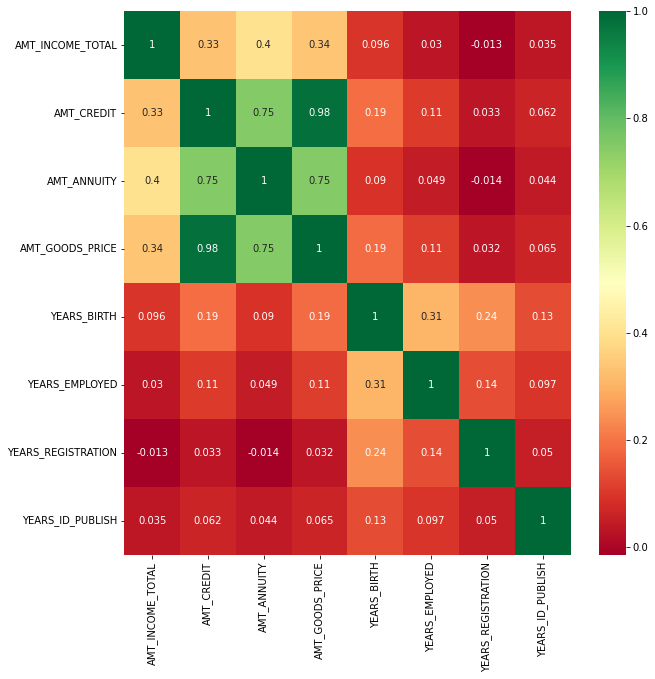

In [ ]:
# here we are taking data rows where TARGET=1 (Client with payment difficulty)

plt.figure(figsize=[10,10])
sns.heatmap(df_app_numerical_with_difficulty.corr(), annot=True, cmap='RdYlGn')
plt.show()

#### From the above heatmap, it can be concluded that top 10 correlation variable pair are: (Variable1, Variable2, Correlation)
#### 1) AMT_CREDIT & AMT_GOODS_PRICE : 0.98
#### 2) AMT_ANNUITY & AMT_GOODS_PRICE : 0.75
#### 3) AMT_CREDIT & AMT_ANNUITY : 0.75
#### 4) AMT_INCOME_TOTAL & AMT_ANNUITY : 0.40
#### 5) AMT_INCOME_TOTAL & AMT_GOODS_PRICE : 0.34
#### 6) AMT_INCOME_TOTAL & AMT_CREDIT : 0.33
#### 7) YEARS_BIRTH & YEARS_EMPLOYED : 0.31
#### 8) YEARS_BIRTH & YEARS_REGISTRATION : 0.24
#### 9) AMT_CREDIT & YEARS_BIRTH : 0.19
#### 10) AMT_GOODS_PRICE & YEARS_EMPLOYED : 0.11


## Now looking at Previous application data

In [ ]:
df_prev = pd.read_csv('previous_application.csv')
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [ ]:
# finding null values percentage of each column

((df_prev.isnull().sum()/ df_prev.shape[0])*100).sort_values(ascending=False).head(20)

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_YIELD_GROUP              0.000000
NAME_PORTFOLIO                0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
dtype: float64

In [ ]:
# finding columns with null value percentage > 25%

not_imp_col = []

for c in df_prev.columns:
    null_percentage = (df_prev[c].isnull().sum())/(df_prev.shape[0])
    if null_percentage > 0.25:
        not_imp_col.append(c)
        print(c, " : ", null_percentage*100)

AMT_DOWN_PAYMENT  :  53.636480115721696
RATE_DOWN_PAYMENT  :  53.636480115721696
RATE_INTEREST_PRIMARY  :  99.6436983524267
RATE_INTEREST_PRIVILEGED  :  99.6436983524267
NAME_TYPE_SUITE  :  49.11975351661524
DAYS_FIRST_DRAWING  :  40.29812946125467
DAYS_FIRST_DUE  :  40.29812946125467
DAYS_LAST_DUE_1ST_VERSION  :  40.29812946125467
DAYS_LAST_DUE  :  40.29812946125467
DAYS_TERMINATION  :  40.29812946125467
NFLAG_INSURED_ON_APPROVAL  :  40.29812946125467


In [ ]:
# dropping columns where null value percentage > 25%

df_prev.drop(labels=not_imp_col, axis=1, inplace=True)
df_prev.shape

(1670214, 26)

In [ ]:
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [ ]:
df_prev['NAME_CASH_LOAN_PURPOSE'].value_counts().head()

XAP             922661
XNA             677918
Repairs          23765
Other            15608
Urgent needs      8412
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

In [ ]:
# from aboveb column, we can conclude that there are many values where values are XAP and XNA, these are to be replaced with np.nan

In [ ]:
df_prev = df_prev.replace('XNA', np.nan).replace('XAP', np.nan)

In [ ]:
# finding columns with null value percentage > 25%
not_imp_col = []

for c in df_prev.columns:
    null_percentage = (df_prev[c].isnull().sum())/(df_prev.shape[0])
    if null_percentage > 0.25:
        not_imp_col.append(c)
        print(c, " : ", null_percentage*100)

NAME_CASH_LOAN_PURPOSE  :  95.83077378108435
NAME_PAYMENT_TYPE  :  37.56309071771641
CODE_REJECT_REASON  :  81.32712335066046
NAME_GOODS_CATEGORY  :  56.92737577340389
NAME_PRODUCT_TYPE  :  63.68441409304436
NAME_SELLER_INDUSTRY  :  51.23415322826895
NAME_YIELD_GROUP  :  30.96698985878456


In [ ]:
# dropping columns with null value percentage > 25%

df_prev.drop(labels=not_imp_col, axis=1, inplace=True)
df_prev.shape

(1670214, 19)

In [ ]:
((df_prev.isnull().sum()/ df_prev.shape[0])*100).sort_values(ascending=False).head(10)

AMT_GOODS_PRICE        23.081773
AMT_ANNUITY            22.286665
CNT_PAYMENT            22.286366
NAME_PORTFOLIO         22.286366
NAME_CLIENT_TYPE        0.116213
PRODUCT_COMBINATION     0.020716
NAME_CONTRACT_TYPE      0.020716
AMT_CREDIT              0.000060
DAYS_DECISION           0.000000
SELLERPLACE_AREA        0.000000
dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

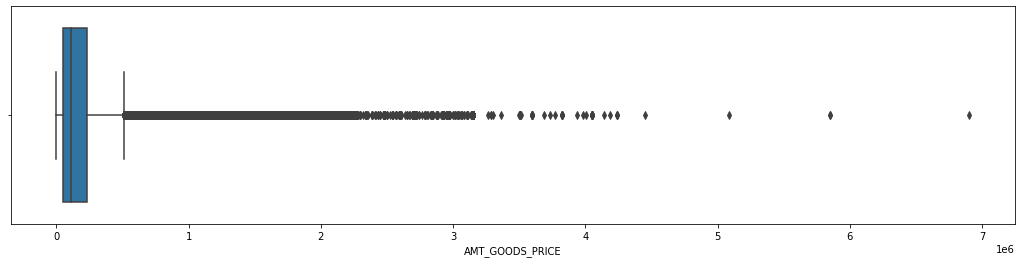

In [ ]:
# checking for outliers in AMT_GOODS_PRICE column

plt.figure(figsize=[18,4])
sns.boxplot(df_prev['AMT_GOODS_PRICE'])

In [ ]:
df_prev[df_prev['AMT_GOODS_PRICE'] > 5000000].shape

(4, 19)

In [ ]:
# fixing outliers (remove 4 outlier values)
df_prev = df_prev[df_prev['AMT_GOODS_PRICE'] < 5000000]

In [ ]:
df_prev['AMT_GOODS_PRICE'].median()

112320.0

In [ ]:
df_prev['AMT_GOODS_PRICE'].fillna(112320, inplace=True)
df_prev['AMT_GOODS_PRICE'].isnull().sum()

0

<AxesSubplot:xlabel='AMT_ANNUITY'>

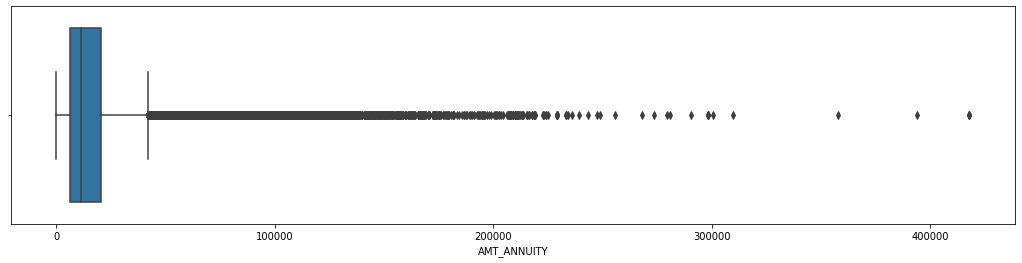

In [ ]:
# checking for outliers in AMT_ANNUITY column

plt.figure(figsize=[18,4])
sns.boxplot(df_prev['AMT_ANNUITY'])

In [ ]:
df_prev['AMT_ANNUITY'].median()

11250.0

In [ ]:
df_prev['AMT_ANNUITY'].fillna(11250, inplace=True)
df_prev['AMT_ANNUITY'].isnull().sum()

0

<AxesSubplot:xlabel='CNT_PAYMENT'>

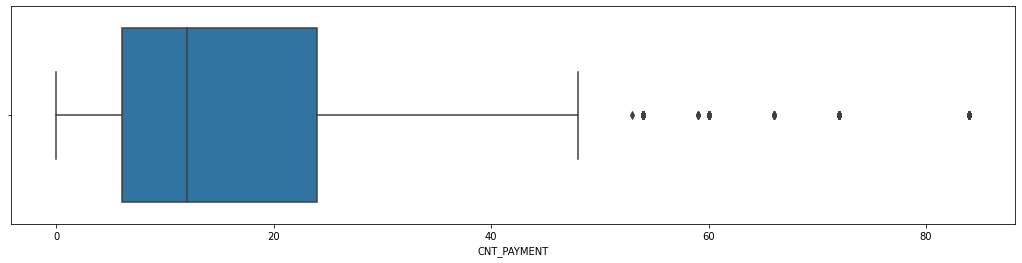

In [ ]:
plt.figure(figsize=[18,4])
sns.boxplot(df_prev['CNT_PAYMENT'])

In [ ]:
df_prev['CNT_PAYMENT'].median()

12.0

In [ ]:
df_prev['CNT_PAYMENT'].fillna(12, inplace=True)
df_prev['CNT_PAYMENT'].isnull().sum()

0

In [ ]:
df_prev['NAME_PORTFOLIO'].value_counts()

POS      691011
Cash     461563
Cards     93325
Cars        422
Name: NAME_PORTFOLIO, dtype: int64

In [ ]:
df_prev['NAME_PORTFOLIO'].fillna('POS', inplace=True)
df_prev['NAME_PORTFOLIO'].isnull().sum()

0

In [ ]:
df_prev['NAME_CLIENT_TYPE'].value_counts()

Repeater     874060
New          297764
Refreshed    111935
Name: NAME_CLIENT_TYPE, dtype: int64

In [ ]:
df_prev['NAME_CLIENT_TYPE'].fillna('Repeater', inplace=True)
df_prev['NAME_CLIENT_TYPE'].isnull().sum()

0

In [ ]:
df_prev['PRODUCT_COMBINATION'].value_counts()

POS household with interest       263539
POS mobile with interest          220393
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
POS industry with interest         98814
POS household without interest     82908
Cash Street: high                  59639
Cash X-Sell: high                  59301
Card Street                        51521
Card X-Sell                        41808
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            22897
POS industry without interest      12602
POS others without interest         2555
Cash                                2013
Name: PRODUCT_COMBINATION, dtype: int64

In [ ]:
df_prev['PRODUCT_COMBINATION'].fillna('Cash', inplace=True)
df_prev['PRODUCT_COMBINATION'].isnull().sum()

0

In [ ]:
df_prev['NAME_CONTRACT_TYPE'].value_counts()

Consumer loans     727790
Cash loans         463576
Revolving loans     93329
Name: NAME_CONTRACT_TYPE, dtype: int64

In [ ]:
df_prev['NAME_CONTRACT_TYPE'].fillna('Cash loans', inplace=True)
df_prev['NAME_CONTRACT_TYPE'].isnull().sum()

0

In [ ]:
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                       1             Approved            -73   
1                       1             Approved           -164   
2                       1             Approved           -301   
3                       1             Approved           -512   
4                       1              Refused           -781   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  SELLERPLACE_AREA  \
0         Repeater            POS             Country-wide                35   
1         Repeater           Cash           Contact center                -1   
2         Repeater           Cash  Credit and cash offices                -1   
3         Repeater           Cash  Credit and cash offices                -1   
4         Repeater           Cash  Credit and cash offices                -1   

   CNT_PAYMENT       PRODUCT_COMBINATION  
0         12.0  POS mobile with interest  
1         36.0          Cash X-Sell: low  
2         12.0         Cash X-Sell: high  
3         12.0       Cash X-Sell: middle  
4         24.0         Cash Street: high

In [ ]:
df_prev['SELLERPLACE_AREA'].value_counts(normalize=True)*100

# we have to drop SELLERPLACE_AREA column as 33% of the values are -1 (missing)

-1        32.962765
 0         3.141213
 50        2.847291
 30        2.619454
 20        2.573373
            ...    
 20000     0.000078
 6624      0.000078
 10462     0.000078
 7518      0.000078
 3001      0.000078
Name: SELLERPLACE_AREA, Length: 2092, dtype: float64

In [ ]:
df_prev.drop('SELLERPLACE_AREA', axis=1, inplace=True)

In [ ]:
# converting DAYS_DECISION value to positive number

df_prev['DAYS_DECISION'] = abs(df_prev['DAYS_DECISION'])

In [ ]:
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                       1             Approved             73   
1                       1             Approved            164   
2                       1             Approved            301   
3                       1             Approved            512   
4                       1              Refused            781   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  CNT_PAYMENT  \
0         Repeater            POS             Country-wide         12.0   
1         Repeater           Cash           Contact center         36.0   
2         Repeater           Cash  Credit and cash offices         12.0   
3         Repeater           Cash  Credit and cash offices         12.0   
4         Repeater           Cash  Credit and cash offices         24.0   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

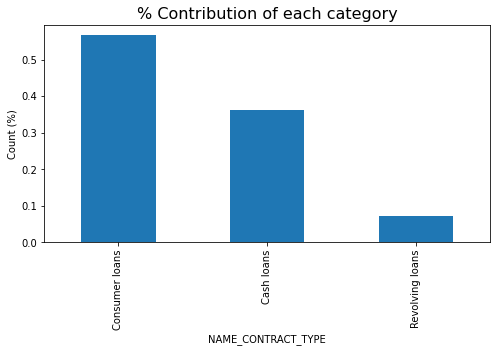

In [ ]:
# for NAME_CONTRACT_TYPE column

plt.figure(figsize=[8,4]) # so that both plots can come in the same figure
df_prev['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("Count (%)")


plt.show()

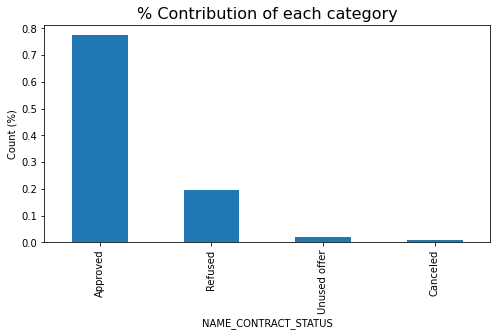

In [ ]:
# for NAME_CONTRACT_STATUS column

plt.figure(figsize=[8,4]) # so that both plots can come in the same figure
df_prev['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_CONTRACT_STATUS")
plt.ylabel("Count (%)")


plt.show()

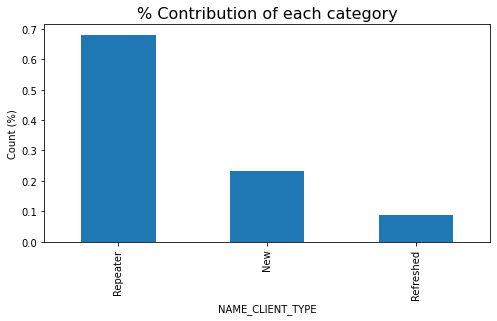

In [ ]:
# for NAME_CONTRACT_STATUS column

plt.figure(figsize=[8,4]) # so that both plots can come in the same figure
df_prev['NAME_CLIENT_TYPE'].value_counts(normalize=True).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_CLIENT_TYPE")
plt.ylabel("Count (%)")


plt.show()

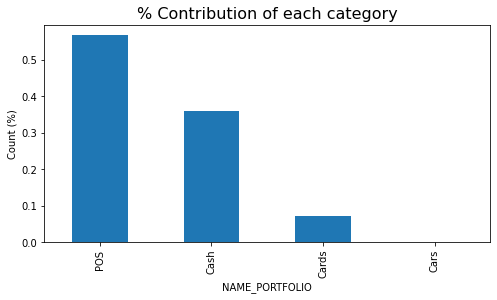

In [ ]:
# for NAME_CONTRACT_STATUS column

plt.figure(figsize=[8,4]) # so that both plots can come in the same figure
df_prev['NAME_PORTFOLIO'].value_counts(normalize=True).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_PORTFOLIO")
plt.ylabel("Count (%)")


plt.show()

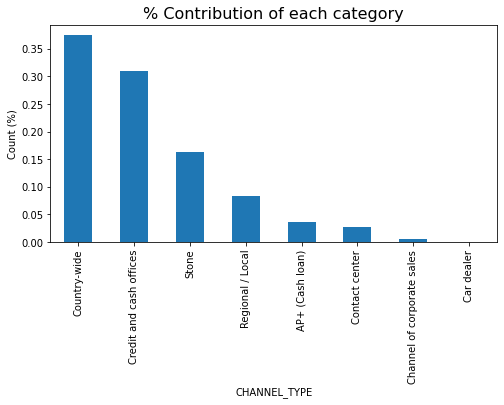

In [ ]:
# for CHANNEL_TYPE column

plt.figure(figsize=[8,4]) # so that both plots can come in the same figure
df_prev['CHANNEL_TYPE'].value_counts(normalize=True).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("CHANNEL_TYPE")
plt.ylabel("Count (%)")


plt.show()

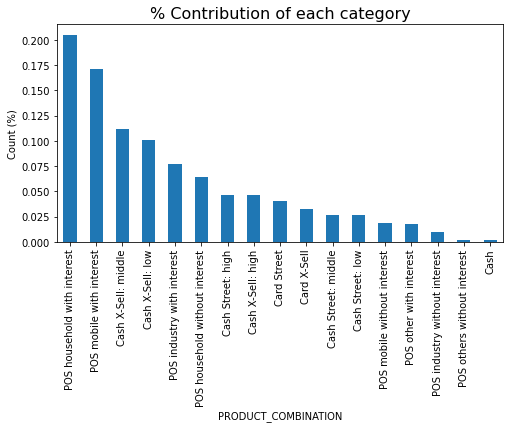

In [ ]:
# for PRODUCT_COMBINATION column

plt.figure(figsize=[8,4]) # so that both plots can come in the same figure
df_prev['PRODUCT_COMBINATION'].value_counts(normalize=True).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("PRODUCT_COMBINATION")
plt.ylabel("Count (%)")


plt.show()

In [ ]:
df_merged = df_app.merge(df_prev, on='SK_ID_CURR', how='inner')
df_merged.shape

(887540, 65)

In [ ]:
df_merged.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801        Laborers              1.0   
1                    0.003541      Core staff              2.0   
2                    0.003541      Core staff              2.0   
3                    0.003541      Core staff              2.0   
4                    0.010032        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x       ORGANIZATION_TYPE  \
0                    WEDNESDAY  Business Entity Type 3   
1                       MONDAY                  School   
2                       MONDAY                  School   
3                       MONDAY                  School   
4                       MONDAY              Government   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0

<AxesSubplot:>

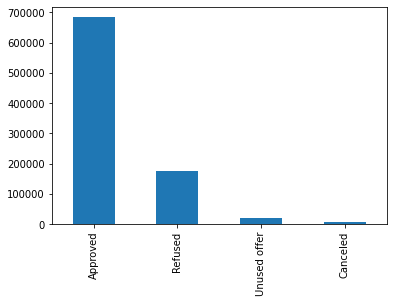

In [ ]:
df_merged['NAME_CONTRACT_STATUS'].value_counts().plot.bar()

In [ ]:
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                       1             Approved             73   
1                       1             Approved            164   
2                       1             Approved            301   
3                       1             Approved            512   
4                       1              Refused            781   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  CNT_PAYMENT  \
0         Repeater            POS             Country-wide         12.0   
1         Repeater           Cash           Contact center         36.0   
2         Repeater           Cash  Credit and cash offices         12.0   
3         Repeater           Cash  Credit and cash offices         12.0   
4         Repeater           Cash  Credit and cash offices         24.0   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

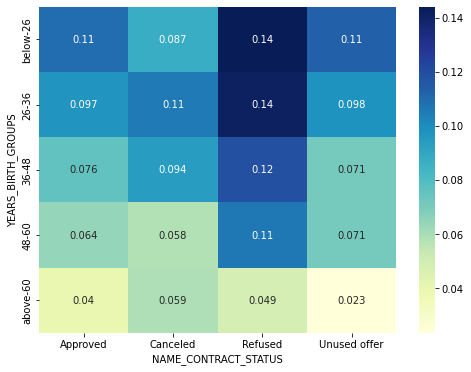

In [ ]:
pt_1 = pd.pivot_table(df_merged, index=['YEARS_BIRTH_GROUPS'], columns=['NAME_CONTRACT_STATUS'], values='TARGET')

plt.figure(figsize=[8,6])
sns.heatmap(pt_1, annot=True, cmap='YlGnBu')
plt.show()

# Observation: Applicants which are rejected/Refused in previous time have more loan payment difficulty (and the younger the age, more is tha payment difficulty)

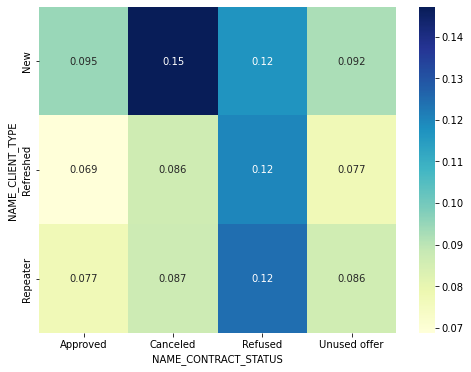

In [ ]:

pt_2 = pd.pivot_table(df_merged, index=['NAME_CLIENT_TYPE'], columns=['NAME_CONTRACT_STATUS'], values='TARGET')

plt.figure(figsize=[8,6])
sns.heatmap(pt_2, annot=True, cmap='YlGnBu')
plt.show()

# Observation: Applicants with canceled loan application in previous time and which are new to the loan organization have highest loan payment difficulty (15%)
# Observation: 

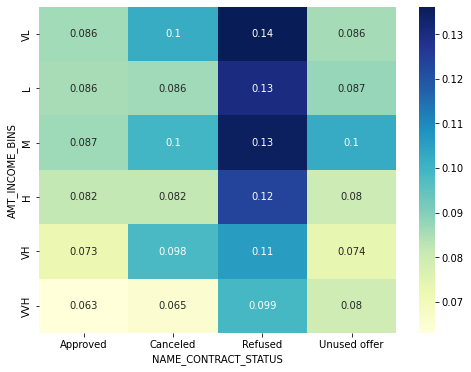

In [ ]:
pt_3 = pd.pivot_table(df_merged, index=['AMT_INCOME_BINS'], columns=['NAME_CONTRACT_STATUS'], values='TARGET')

plt.figure(figsize=[8,6])
sns.heatmap(pt_3, annot=True, cmap='YlGnBu')
plt.show()

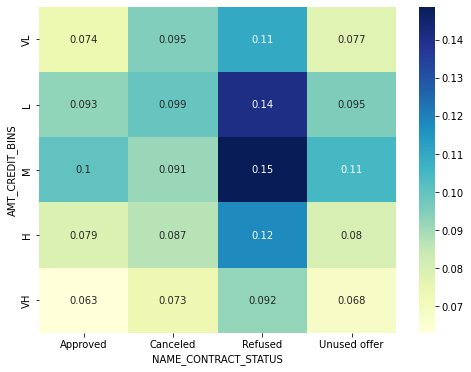

In [ ]:

pt_4 = pd.pivot_table(df_merged, index=['AMT_CREDIT_BINS'], columns=['NAME_CONTRACT_STATUS'], values='TARGET')

plt.figure(figsize=[8,6])
sns.heatmap(pt_4, annot=True, cmap='YlGnBu')
plt.show()

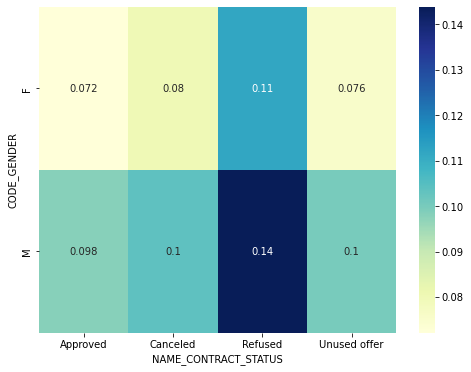

In [ ]:
pt_5 = pd.pivot_table(df_merged, index=['CODE_GENDER'], columns=['NAME_CONTRACT_STATUS'], values='TARGET')

plt.figure(figsize=[8,6])
sns.heatmap(pt_5, annot=True, cmap='YlGnBu')
plt.show()

# Observation: Males with refused loan application in previous time have more loan payment difficulty

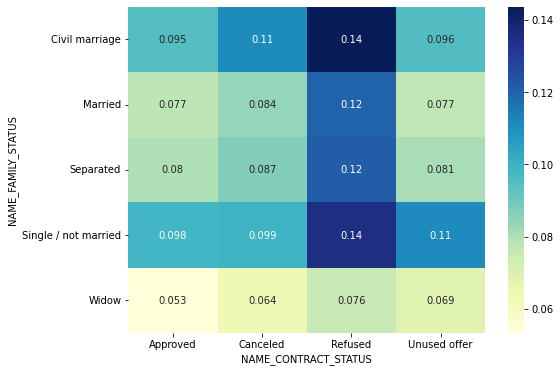

In [ ]:

pt_6 = pd.pivot_table(df_merged, index=['NAME_FAMILY_STATUS'], columns=['NAME_CONTRACT_STATUS'], values='TARGET')

plt.figure(figsize=[8,6])
sns.heatmap(pt_6, annot=True, cmap='YlGnBu')
plt.show()

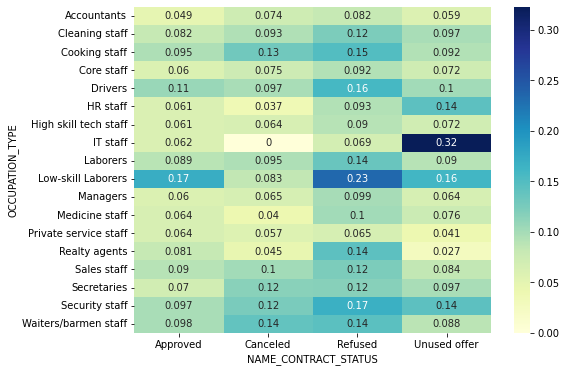

In [ ]:
pt_7 = pd.pivot_table(df_merged, index=['OCCUPATION_TYPE'], columns=['NAME_CONTRACT_STATUS'], values='TARGET')

plt.figure(figsize=[8,6])
sns.heatmap(pt_7, annot=True, cmap='YlGnBu')
plt.show()

# Observation: IT employees with previously unused contract have highest loan payment difficulty(32%), even more than the applicants which are previously refused for the loan

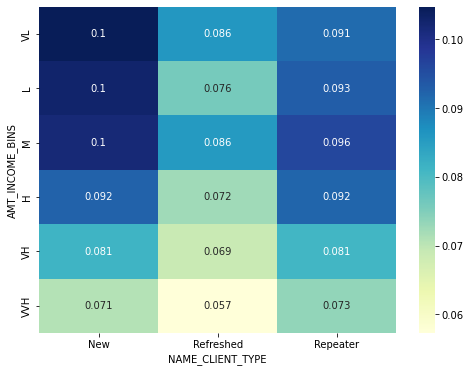

In [ ]:
pt_8 = pd.pivot_table(df_merged, index=['AMT_INCOME_BINS'], columns=['NAME_CLIENT_TYPE'], values='TARGET')

plt.figure(figsize=[8,6])
sns.heatmap(pt_8, annot=True, cmap='YlGnBu')
plt.show()

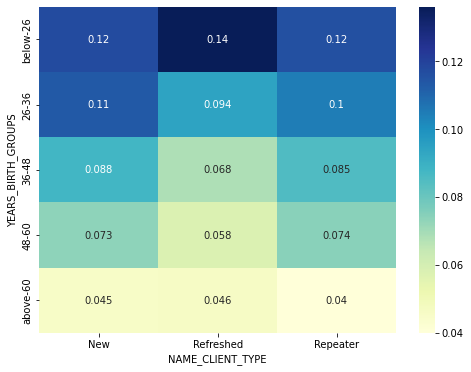

In [ ]:
pt_9 = pd.pivot_table(df_merged, index=['YEARS_BIRTH_GROUPS'], columns=['NAME_CLIENT_TYPE'], values='TARGET')

plt.figure(figsize=[8,6])
sns.heatmap(pt_9, annot=True, cmap='YlGnBu')
plt.show()

# Observation: Refreshed type of previous applicants which are below 26 years of age have highest loan payment difficulty (14%)